# AutoRec cs3639 Recommendation Systems course IDC

### here will be general explanations

In [4]:
import numpy as np
import pandas as pd
import torch
import json
from time import time
from utils.plots import plot_train_history
from utils.models_results import models_results

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

# Matrix Factorization

In [6]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [7]:
from src.data_prep import movielens_load
train, test = movielens_load(1)
print(train.shape)
train

(80000, 4)


user_id  item_id  rating  timestamp
0            0        0       5  874965758
1            0        1       3  876893171
2            0        2       4  878542960
3            0        3       3  876893119
4            0        4       3  889751712
...        ...      ...     ...        ...
79995      942     1066       2  875501756
79996      942     1073       4  888640250
79997      942     1187       3  888640250
79998      942     1227       3  888640275
79999      942     1329       3  888692465

[80000 rows x 4 columns]

In [10]:
# If you wish to find hyper params run `mf_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models

epochs = 60
batch_size = 64

def mf_hyper_params(find=False):
    if find:
        for k in [10, 15, 20, 50, 100]:
            for lr in [0.001, 0.003, 0.005]:
                for reg in [0.001, 0.003, 0.005]:
                    print(f'STARTING TRAIN MF with k: {k}, lr: {lr}, reg: {reg}')
                    start_time = time()
                    model_dict = {}
                    num_users = train.user_id.max() + 1
                    num_items = train.item_id.max() + 1

                    # Init model and trainer
                    model = MatrixFactorization(num_users, num_items, k=k)
                    mf_trainer = MFTrainer(train, test, model, epochs=epochs, lr=lr, reg=reg, batch_size=batch_size)

                    # Train
                    mf_trainer.train_model()

                    # Save parmas to model_dict
                    model_dict['model_params'] = model.params()
                    model_dict.update(mf_trainer.params())
                    model_dict['train_losses'] = mf_trainer.train_losses
                    model_dict['val_losses'] = mf_trainer.val_losses

                    # Save model params to json file
                    file_name = f'models_params/MF_{k}_{lr}_{reg}'
                    with open(file_name, 'w') as f:
                        json.dump(model_dict, f, indent=4)

                    plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)
                    print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('MF')


In [14]:
mf_results = mf_hyper_params(False)
mf_results.sort_values(by='val_loss')

model_name  train_loss  val_loss  \
9    MF_10_0.001_0.001    2.069061  2.252201   
18   MF_15_0.001_0.001    2.072956  2.254183   
27   MF_20_0.001_0.001    2.074550  2.255035   
36   MF_50_0.001_0.001    2.081092  2.259130   
0   MF_100_0.001_0.001    2.085245  2.261896   
12   MF_10_0.003_0.001    2.087885  2.263649   
21   MF_15_0.003_0.001    2.088505  2.264293   
30   MF_20_0.003_0.001    2.091324  2.266042   
15   MF_10_0.005_0.001    2.092465  2.266833   
24   MF_15_0.005_0.001    2.093361  2.267727   
39   MF_50_0.003_0.001    2.094311  2.268215   
6   MF_100_0.005_0.001    2.099375  2.271951   
3   MF_100_0.003_0.001    2.100491  2.273046   
33   MF_20_0.005_0.001    2.102497  2.274705   
42   MF_50_0.005_0.001    2.104230  2.275961   
44   MF_50_0.005_0.005    3.699376  3.716898   
8   MF_100_0.005_0.005    3.699376  3.716898   
26   MF_15_0.005_0.005    3.699377  3.716898   
35   MF_20_0.005_0.005    3.699376  3.716898   
23   MF_15_0.003_0.005    3.699376  3.716898   
14   MF_10_0.003_0.005    3.699376  3.716898   
16   MF_10_0.005_0.003    3.699376  3.716898   
13   MF_10_0.003_0.003    3.699376  3.716898   
1   MF_100_0.001_0.003    3.699376  3.716898   
38   MF_50_0.001_0.005    3.699377  3.716898   
2   MF_100_0.001_0.005    3.699376  3.716898   
41   MF_50_0.003_0.005    3.699376  3.716898   
29   MF_20_0.001_0.005    3.699376  3.716898   
20   MF_15_0.001_0.005    3.699377  3.716898   
11   MF_10_0.001_0.005    3.699377  3.716898   
10   MF_10_0.001_0.003    3.699377  3.716898   
17   MF_10_0.005_0.005    3.699376  3.716898   
32   MF_20_0.003_0.005    3.699376  3.716898   
19   MF_15_0.001_0.003    3.699376  3.716898   
5   MF_100_0.003_0.005    3.699376  3.716898   
28   MF_20_0.001_0.003    3.699376  3.716898   
37   MF_50_0.001_0.003    3.699376  3.716898   
22   MF_15_0.003_0.003    3.699376  3.716899   
34   MF_20_0.005_0.003    3.699376  3.716899   
7   MF_100_0.005_0.003    3.699374  3.716899   
31   MF_20_0.003_0.003    3.699376  3.716899   
40   MF_50_0.003_0.003    3.699376  3.716899   
25   MF_15_0.005_0.003    3.699376  3.716899   
4   MF_100_0.003_0.003    3.699376  3.716899   
43   MF_50_0.005_0.003    3.699375  3.716900   

                                               params  
9   {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
18  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
27  {'model_params': {'k': 20}, 'seed': 14, 'epoch...  
36  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
0   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
12  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
21  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
30  {'model_params': {'k': 20}, 'seed': 14, 'epoch...  
15  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
24  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
39  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
6   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
3   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
33  {'model_params': {'k': 20}, 'seed': 14, 'epoch...  
42  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
44  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
8   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
26  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
35  {'model_params': {'k': 20}, 'seed': 14, 'epoch...  
23  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
14  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
16  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
13  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
1   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
38  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
2   {'model_params': {'k': 100}, 'seed': 14, 'epoc...  
41  {'model_params': {'k': 50}, 'seed': 14, 'epoch...  
29  {'model_params': {'k': 20}, 'seed': 14, 'epoch...  
20  {'model_params': {'k': 15}, 'seed': 14, 'epoch...  
11  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
10  {'model_params': {'k': 10}, 'seed': 14, 'epoch...  
17  {'model

# AutoRec

In [7]:
from src.data_prep import movielens_create_ratings
train, test = movielens_create_ratings(1)
train

0     1     2     3     4     5     6     7     8     9     ...  1672  \
0       5     3     4     3     3     0     4     1     5     0  ...     0   
1       4     0     0     0     0     0     0     0     0     2  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
938     0     0     0     0     0     0     0     0     5     0  ...     0   
939     0     0     0     2     0     0     4     5     3     0  ...     0   
940     5     0     0     0     0     0     4     0     0     0  ...     0   
941     0     0     0     0     0     0     0     0     0     0  ...     0   
942     0     5     0     0     0     0     0     0     3     0  ...     0   

     1673  1674  1675  1676  1677  1678  1679  1680  1681  
0       0     0     0     0     0     0     0     0     0  
1       0     0     0     0     0     0     0     0     0  
2       0     0     0     0     0     0     0     0     0  
3       0     0     0     0     0     0     0     0     0  
4       0     0     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
938     0     0     0     0     0     0     0     0     0  
939     0     0     0     0     0     0     0     0     0  
940     0     0     0     0     0     0     0     0     0  
941     0     0     0     0     0     0     0     0     0  
942     0     0     0     0     0     0     0     0     0  

[943 rows x 1682 columns]

In [8]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

In [9]:
# If you wish to find hyper params run `autorec_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models

epochs = 60
batch_size = 64


def autorec_hyper_params(find=False):
    if find:
        for num_hidden in [100, 200, 500, 600]:
            for lr in [0.001, 0.003, 0.005]:
                for reg in [0.001, 0.01, 0.1, 1, 100, 1000]:
                    print(f'STARTING TRAIN AutoRec with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}')
                    start_time = time()
                    model_dict = {}

                    num_users, num_items = train.shape

                    # Init model and trainer
                    model = AutoRec(num_hidden=num_hidden, num_features=num_users)
                    autorec_trainer = AutoRecTrainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

                    # Train
                    autorec_trainer.train_model()

                    # Save parmas to model_dict
                    model_dict['model_params'] = model.params()
                    model_dict.update(autorec_trainer.params())
                    model_dict['train_losses'] = autorec_trainer.train_losses
                    model_dict['val_losses'] = autorec_trainer.val_losses

                    # Save model params to json file
                    file_name = f'models_params/AutoRec_{num_hidden}_{lr}_{reg}'
                    with open(file_name, 'w') as f:
                        json.dump(model_dict, f, indent=4)

                    plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
                    print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('AutoRec')



STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 2.811, val: 1.759
EPOCH 2: Avg losses: train: 1.264, val: 1.042
EPOCH 3: Avg losses: train: 1.022, val: 1.007
EPOCH 4: Avg losses: train: 0.996, val: 0.986
EPOCH 5: Avg losses: train: 0.971, val: 0.967
EPOCH 6: Avg losses: train: 0.952, val: 0.943
EPOCH 7: Avg losses: train: 0.941, val: 0.935
EPOCH 8: Avg losses: train: 0.933, val: 0.932
EPOCH 9: Avg losses: train: 0.927, val: 0.939
EPOCH 10: Avg losses: train: 0.924, val: 0.927
EPOCH 11: Avg losses: train: 0.920, val: 0.943
EPOCH 12: Avg losses: train: 0.912, val: 0.912
EPOCH 13: Avg losses: train: 0.906, val: 0.929
EPOCH 14: Avg losses: train: 0.903, val: 0.917
EPOCH 15: Avg losses: train: 0.904, val: 0.919
EPOCH 16: Avg losses: train: 0.900, val: 0.918
EPOCH 17: Avg losses: train: 0.897, val: 0.905
EPOCH 18: Avg losses: train: 0.891, val: 0.903
EPOCH 19: Avg losses: train: 0.888, val: 0.902
EPOCH 20: Avg losses: train: 0.885, val: 0.897
EP

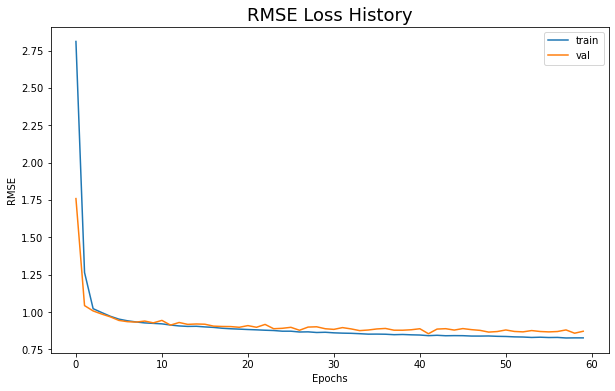

model train time: 12.458

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.01
EPOCH 1: Avg losses: train: 3.022, val: 2.228
EPOCH 2: Avg losses: train: 1.679, val: 1.334
EPOCH 3: Avg losses: train: 1.200, val: 1.172
EPOCH 4: Avg losses: train: 1.123, val: 1.146
EPOCH 5: Avg losses: train: 1.116, val: 1.142
EPOCH 6: Avg losses: train: 1.114, val: 1.112
EPOCH 7: Avg losses: train: 1.107, val: 1.111
EPOCH 8: Avg losses: train: 1.106, val: 1.107
EPOCH 9: Avg losses: train: 1.103, val: 1.122
EPOCH 10: Avg losses: train: 1.101, val: 1.113
EPOCH 11: Avg losses: train: 1.099, val: 1.123
EPOCH 12: Avg losses: train: 1.100, val: 1.093
EPOCH 13: Avg losses: train: 1.097, val: 1.118
EPOCH 14: Avg losses: train: 1.099, val: 1.111
EPOCH 15: Avg losses: train: 1.102, val: 1.112
EPOCH 16: Avg losses: train: 1.101, val: 1.112
EPOCH 17: Avg losses: train: 1.103, val: 1.100
EPOCH 18: Avg losses: train: 1.098, val: 1.104
EPOCH 19: Avg losses: train: 1.100, val: 1.143
EPOCH 20: Avg losses: tr

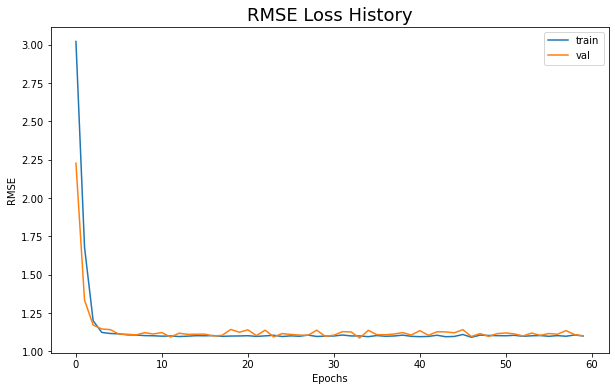

model train time: 12.183

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.1
EPOCH 1: Avg losses: train: 3.592, val: 3.461
EPOCH 2: Avg losses: train: 3.330, val: 3.208
EPOCH 3: Avg losses: train: 3.042, val: 2.954
EPOCH 4: Avg losses: train: 2.863, val: 2.830
EPOCH 5: Avg losses: train: 2.762, val: 2.783
EPOCH 6: Avg losses: train: 2.711, val: 2.714
EPOCH 7: Avg losses: train: 2.688, val: 2.719
EPOCH 8: Avg losses: train: 2.661, val: 2.708
EPOCH 9: Avg losses: train: 2.662, val: 2.725
EPOCH 10: Avg losses: train: 2.655, val: 2.699
EPOCH 11: Avg losses: train: 2.653, val: 2.663
EPOCH 12: Avg losses: train: 2.659, val: 2.681
EPOCH 13: Avg losses: train: 2.650, val: 2.708
EPOCH 14: Avg losses: train: 2.654, val: 2.674
EPOCH 15: Avg losses: train: 2.661, val: 2.727
EPOCH 16: Avg losses: train: 2.650, val: 2.709
EPOCH 17: Avg losses: train: 2.664, val: 2.695
EPOCH 18: Avg losses: train: 2.655, val: 2.702
EPOCH 19: Avg losses: train: 2.662, val: 2.753
EPOCH 20: Avg losses: tra

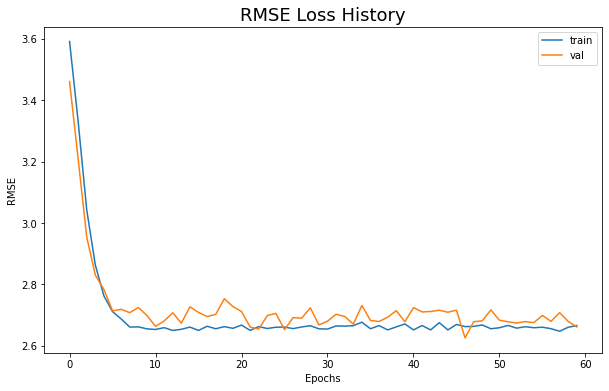

model train time: 11.933

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 1
EPOCH 1: Avg losses: train: 3.679, val: 3.637
EPOCH 2: Avg losses: train: 3.670, val: 3.693
EPOCH 3: Avg losses: train: 3.663, val: 3.625
EPOCH 4: Avg losses: train: 3.658, val: 3.624
EPOCH 5: Avg losses: train: 3.655, val: 3.674
EPOCH 6: Avg losses: train: 3.643, val: 3.627
EPOCH 7: Avg losses: train: 3.645, val: 3.679
EPOCH 8: Avg losses: train: 3.639, val: 3.660
EPOCH 9: Avg losses: train: 3.641, val: 3.673
EPOCH 10: Avg losses: train: 3.636, val: 3.640
EPOCH 11: Avg losses: train: 3.633, val: 3.595
EPOCH 12: Avg losses: train: 3.640, val: 3.667
EPOCH 13: Avg losses: train: 3.636, val: 3.672
EPOCH 14: Avg losses: train: 3.645, val: 3.639
EPOCH 15: Avg losses: train: 3.637, val: 3.720
EPOCH 16: Avg losses: train: 3.630, val: 3.677
EPOCH 17: Avg losses: train: 3.639, val: 3.662
EPOCH 18: Avg losses: train: 3.641, val: 3.648
EPOCH 19: Avg losses: train: 3.643, val: 3.696
EPOCH 20: Avg losses: train

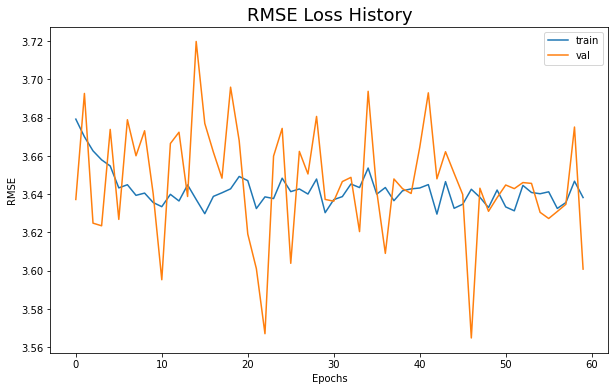

model train time: 11.846

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 100
EPOCH 1: Avg losses: train: 3.689, val: 3.654
EPOCH 2: Avg losses: train: 3.694, val: 3.719
EPOCH 3: Avg losses: train: 3.694, val: 3.658
EPOCH 4: Avg losses: train: 3.697, val: 3.664
EPOCH 5: Avg losses: train: 3.699, val: 3.719
EPOCH 6: Avg losses: train: 3.691, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.723
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.718
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tra

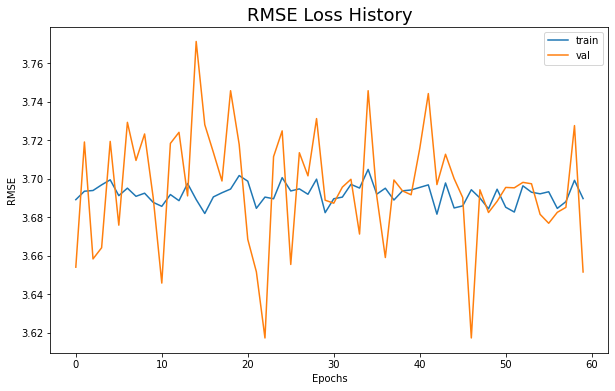

model train time: 12.017

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 1000
EPOCH 1: Avg losses: train: 3.689, val: 3.654
EPOCH 2: Avg losses: train: 3.694, val: 3.719
EPOCH 3: Avg losses: train: 3.694, val: 3.659
EPOCH 4: Avg losses: train: 3.697, val: 3.664
EPOCH 5: Avg losses: train: 3.700, val: 3.720
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

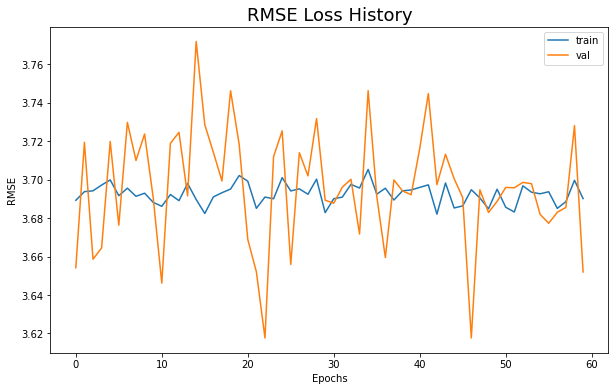

model train time: 14.274

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.822, val: 1.088
EPOCH 2: Avg losses: train: 1.047, val: 1.000
EPOCH 3: Avg losses: train: 0.978, val: 0.972
EPOCH 4: Avg losses: train: 0.952, val: 0.954
EPOCH 5: Avg losses: train: 0.941, val: 0.943
EPOCH 6: Avg losses: train: 0.930, val: 0.922
EPOCH 7: Avg losses: train: 0.918, val: 0.917
EPOCH 8: Avg losses: train: 0.914, val: 0.910
EPOCH 9: Avg losses: train: 0.903, val: 0.918
EPOCH 10: Avg losses: train: 0.897, val: 0.907
EPOCH 11: Avg losses: train: 0.896, val: 0.924
EPOCH 12: Avg losses: train: 0.887, val: 0.889
EPOCH 13: Avg losses: train: 0.880, val: 0.909
EPOCH 14: Avg losses: train: 0.878, val: 0.899
EPOCH 15: Avg losses: train: 0.879, val: 0.908
EPOCH 16: Avg losses: train: 0.879, val: 0.900
EPOCH 17: Avg losses: train: 0.874, val: 0.889
EPOCH 18: Avg losses: train: 0.867, val: 0.887
EPOCH 19: Avg losses: train: 0.866, val: 0.885
EPOCH 20: Avg losses: t

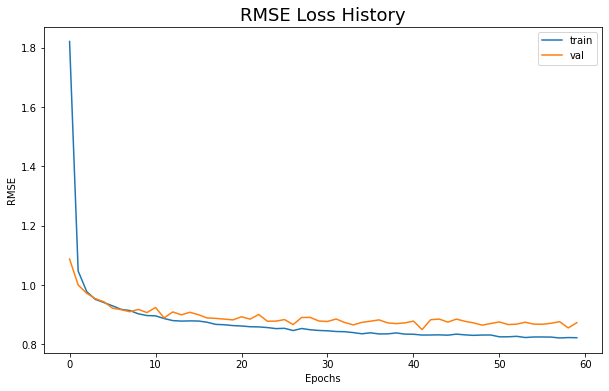

model train time: 12.001

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.01
EPOCH 1: Avg losses: train: 2.064, val: 1.142
EPOCH 2: Avg losses: train: 1.123, val: 1.147
EPOCH 3: Avg losses: train: 1.116, val: 1.146
EPOCH 4: Avg losses: train: 1.120, val: 1.143
EPOCH 5: Avg losses: train: 1.125, val: 1.144
EPOCH 6: Avg losses: train: 1.126, val: 1.116
EPOCH 7: Avg losses: train: 1.122, val: 1.124
EPOCH 8: Avg losses: train: 1.134, val: 1.118
EPOCH 9: Avg losses: train: 1.126, val: 1.133
EPOCH 10: Avg losses: train: 1.123, val: 1.128
EPOCH 11: Avg losses: train: 1.128, val: 1.154
EPOCH 12: Avg losses: train: 1.124, val: 1.111
EPOCH 13: Avg losses: train: 1.124, val: 1.149
EPOCH 14: Avg losses: train: 1.125, val: 1.118
EPOCH 15: Avg losses: train: 1.123, val: 1.137
EPOCH 16: Avg losses: train: 1.132, val: 1.134
EPOCH 17: Avg losses: train: 1.124, val: 1.123
EPOCH 18: Avg losses: train: 1.125, val: 1.127
EPOCH 19: Avg losses: train: 1.128, val: 1.154
EPOCH 20: Avg losses: tr

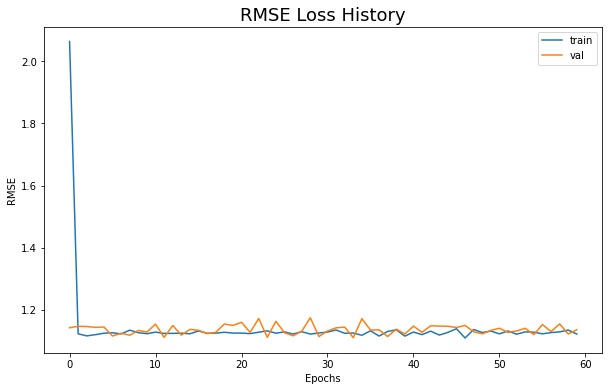

model train time: 11.992

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.1
EPOCH 1: Avg losses: train: 3.339, val: 2.911
EPOCH 2: Avg losses: train: 2.718, val: 2.698
EPOCH 3: Avg losses: train: 2.644, val: 2.679
EPOCH 4: Avg losses: train: 2.664, val: 2.682
EPOCH 5: Avg losses: train: 2.660, val: 2.708
EPOCH 6: Avg losses: train: 2.665, val: 2.672
EPOCH 7: Avg losses: train: 2.667, val: 2.690
EPOCH 8: Avg losses: train: 2.658, val: 2.717
EPOCH 9: Avg losses: train: 2.663, val: 2.728
EPOCH 10: Avg losses: train: 2.661, val: 2.716
EPOCH 11: Avg losses: train: 2.659, val: 2.667
EPOCH 12: Avg losses: train: 2.663, val: 2.682
EPOCH 13: Avg losses: train: 2.662, val: 2.704
EPOCH 14: Avg losses: train: 2.662, val: 2.685
EPOCH 15: Avg losses: train: 2.664, val: 2.740
EPOCH 16: Avg losses: train: 2.659, val: 2.732
EPOCH 17: Avg losses: train: 2.669, val: 2.709
EPOCH 18: Avg losses: train: 2.667, val: 2.731
EPOCH 19: Avg losses: train: 2.667, val: 2.772
EPOCH 20: Avg losses: tra

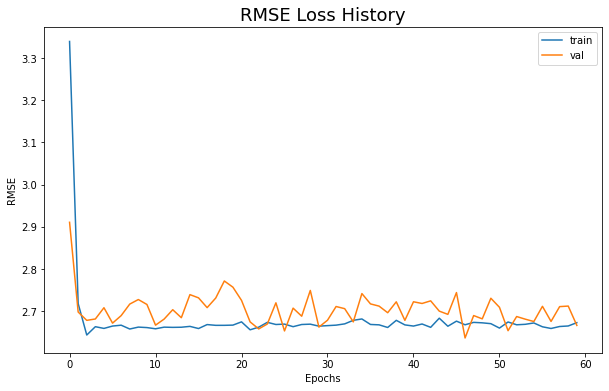

model train time: 11.589

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 1
EPOCH 1: Avg losses: train: 3.666, val: 3.616
EPOCH 2: Avg losses: train: 3.648, val: 3.671
EPOCH 3: Avg losses: train: 3.645, val: 3.610
EPOCH 4: Avg losses: train: 3.647, val: 3.615
EPOCH 5: Avg losses: train: 3.648, val: 3.670
EPOCH 6: Avg losses: train: 3.640, val: 3.624
EPOCH 7: Avg losses: train: 3.643, val: 3.678
EPOCH 8: Avg losses: train: 3.639, val: 3.661
EPOCH 9: Avg losses: train: 3.640, val: 3.673
EPOCH 10: Avg losses: train: 3.636, val: 3.640
EPOCH 11: Avg losses: train: 3.633, val: 3.595
EPOCH 12: Avg losses: train: 3.640, val: 3.667
EPOCH 13: Avg losses: train: 3.637, val: 3.672
EPOCH 14: Avg losses: train: 3.645, val: 3.639
EPOCH 15: Avg losses: train: 3.637, val: 3.720
EPOCH 16: Avg losses: train: 3.630, val: 3.678
EPOCH 17: Avg losses: train: 3.639, val: 3.662
EPOCH 18: Avg losses: train: 3.641, val: 3.649
EPOCH 19: Avg losses: train: 3.643, val: 3.696
EPOCH 20: Avg losses: train

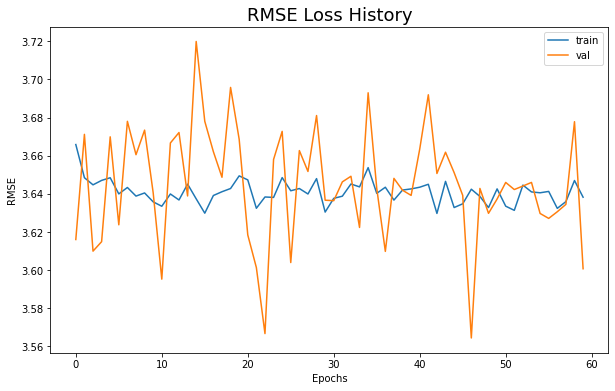

model train time: 10.956

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 100
EPOCH 1: Avg losses: train: 3.688, val: 3.653
EPOCH 2: Avg losses: train: 3.697, val: 3.723
EPOCH 3: Avg losses: train: 3.698, val: 3.660
EPOCH 4: Avg losses: train: 3.699, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.720
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.723
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.718
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tra

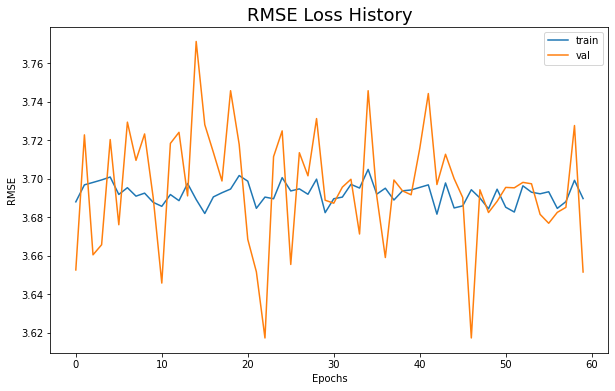

model train time: 11.036

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 1000
EPOCH 1: Avg losses: train: 3.688, val: 3.653
EPOCH 2: Avg losses: train: 3.697, val: 3.723
EPOCH 3: Avg losses: train: 3.699, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

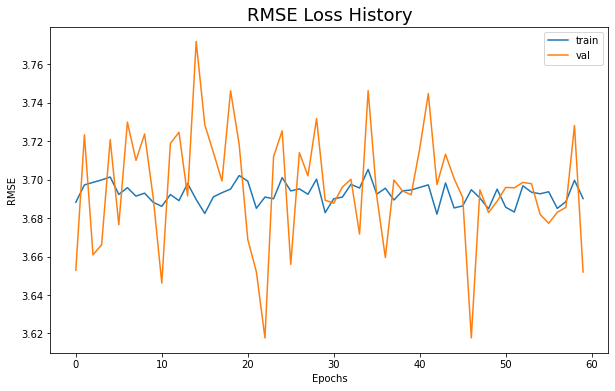

model train time: 11.203

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.611, val: 1.099
EPOCH 2: Avg losses: train: 1.042, val: 0.984
EPOCH 3: Avg losses: train: 0.971, val: 0.973
EPOCH 4: Avg losses: train: 0.951, val: 0.954
EPOCH 5: Avg losses: train: 0.937, val: 0.944
EPOCH 6: Avg losses: train: 0.927, val: 0.922
EPOCH 7: Avg losses: train: 0.917, val: 0.922
EPOCH 8: Avg losses: train: 0.916, val: 0.913
EPOCH 9: Avg losses: train: 0.906, val: 0.921
EPOCH 10: Avg losses: train: 0.901, val: 0.907
EPOCH 11: Avg losses: train: 0.900, val: 0.933
EPOCH 12: Avg losses: train: 0.893, val: 0.896
EPOCH 13: Avg losses: train: 0.887, val: 0.916
EPOCH 14: Avg losses: train: 0.884, val: 0.903
EPOCH 15: Avg losses: train: 0.887, val: 0.914
EPOCH 16: Avg losses: train: 0.887, val: 0.909
EPOCH 17: Avg losses: train: 0.886, val: 0.893
EPOCH 18: Avg losses: train: 0.875, val: 0.893
EPOCH 19: Avg losses: train: 0.874, val: 0.890
EPOCH 20: Avg losses: t

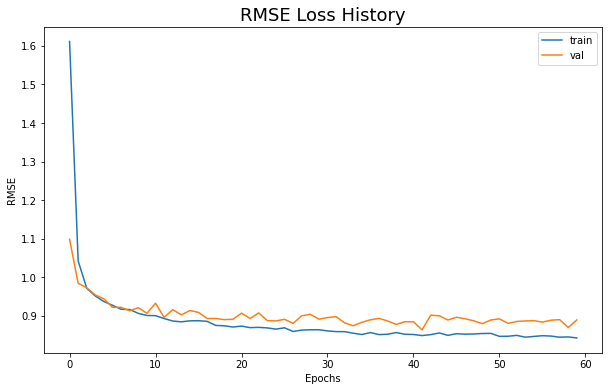

model train time: 11.380

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.01
EPOCH 1: Avg losses: train: 1.747, val: 1.114
EPOCH 2: Avg losses: train: 1.154, val: 1.151
EPOCH 3: Avg losses: train: 1.132, val: 1.173
EPOCH 4: Avg losses: train: 1.144, val: 1.180
EPOCH 5: Avg losses: train: 1.146, val: 1.151
EPOCH 6: Avg losses: train: 1.146, val: 1.150
EPOCH 7: Avg losses: train: 1.145, val: 1.155
EPOCH 8: Avg losses: train: 1.160, val: 1.131
EPOCH 9: Avg losses: train: 1.153, val: 1.141
EPOCH 10: Avg losses: train: 1.143, val: 1.142
EPOCH 11: Avg losses: train: 1.153, val: 1.173
EPOCH 12: Avg losses: train: 1.144, val: 1.144
EPOCH 13: Avg losses: train: 1.147, val: 1.162
EPOCH 14: Avg losses: train: 1.146, val: 1.135
EPOCH 15: Avg losses: train: 1.143, val: 1.151
EPOCH 16: Avg losses: train: 1.155, val: 1.148
EPOCH 17: Avg losses: train: 1.146, val: 1.156
EPOCH 18: Avg losses: train: 1.146, val: 1.160
EPOCH 19: Avg losses: train: 1.150, val: 1.177
EPOCH 20: Avg losses: tr

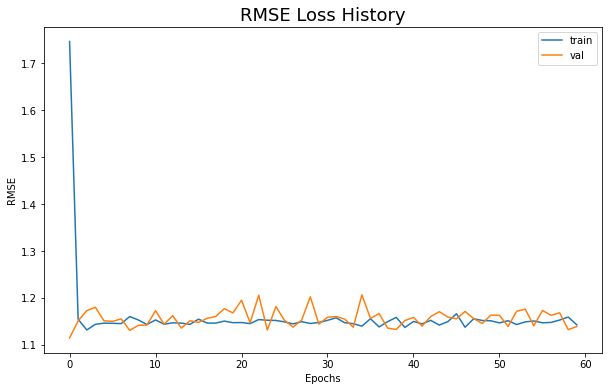

model train time: 11.582

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.1
EPOCH 1: Avg losses: train: 3.112, val: 2.628
EPOCH 2: Avg losses: train: 2.598, val: 2.739
EPOCH 3: Avg losses: train: 2.680, val: 2.695
EPOCH 4: Avg losses: train: 2.663, val: 2.667
EPOCH 5: Avg losses: train: 2.664, val: 2.722
EPOCH 6: Avg losses: train: 2.670, val: 2.667
EPOCH 7: Avg losses: train: 2.671, val: 2.680
EPOCH 8: Avg losses: train: 2.664, val: 2.727
EPOCH 9: Avg losses: train: 2.670, val: 2.734
EPOCH 10: Avg losses: train: 2.666, val: 2.714
EPOCH 11: Avg losses: train: 2.659, val: 2.666
EPOCH 12: Avg losses: train: 2.665, val: 2.725
EPOCH 13: Avg losses: train: 2.668, val: 2.710
EPOCH 14: Avg losses: train: 2.672, val: 2.673
EPOCH 15: Avg losses: train: 2.671, val: 2.735
EPOCH 16: Avg losses: train: 2.665, val: 2.734
EPOCH 17: Avg losses: train: 2.675, val: 2.738
EPOCH 18: Avg losses: train: 2.673, val: 2.718
EPOCH 19: Avg losses: train: 2.671, val: 2.780
EPOCH 20: Avg losses: tra

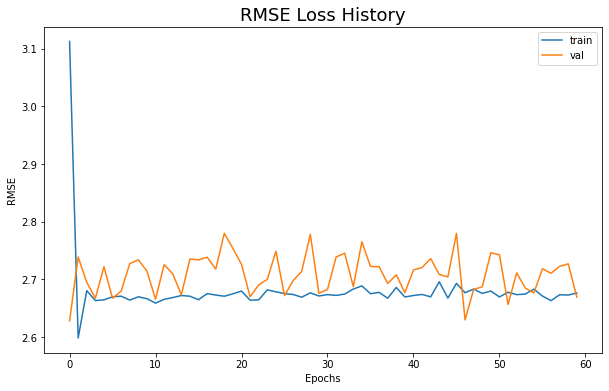

model train time: 11.622

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 1
EPOCH 1: Avg losses: train: 3.657, val: 3.599
EPOCH 2: Avg losses: train: 3.641, val: 3.672
EPOCH 3: Avg losses: train: 3.646, val: 3.611
EPOCH 4: Avg losses: train: 3.647, val: 3.614
EPOCH 5: Avg losses: train: 3.649, val: 3.670
EPOCH 6: Avg losses: train: 3.640, val: 3.623
EPOCH 7: Avg losses: train: 3.643, val: 3.679
EPOCH 8: Avg losses: train: 3.639, val: 3.661
EPOCH 9: Avg losses: train: 3.640, val: 3.674
EPOCH 10: Avg losses: train: 3.636, val: 3.641
EPOCH 11: Avg losses: train: 3.633, val: 3.595
EPOCH 12: Avg losses: train: 3.640, val: 3.667
EPOCH 13: Avg losses: train: 3.637, val: 3.672
EPOCH 14: Avg losses: train: 3.645, val: 3.638
EPOCH 15: Avg losses: train: 3.637, val: 3.720
EPOCH 16: Avg losses: train: 3.630, val: 3.679
EPOCH 17: Avg losses: train: 3.639, val: 3.663
EPOCH 18: Avg losses: train: 3.641, val: 3.648
EPOCH 19: Avg losses: train: 3.643, val: 3.695
EPOCH 20: Avg losses: train

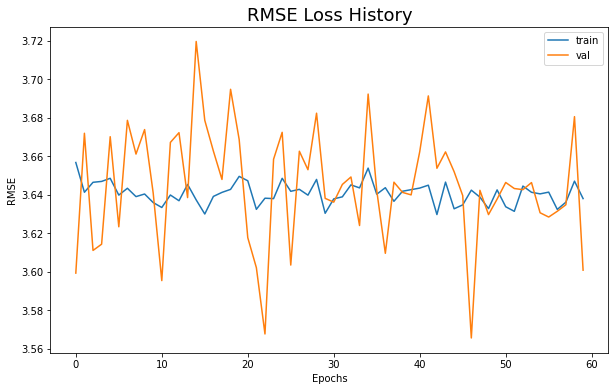

model train time: 11.735

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 100
EPOCH 1: Avg losses: train: 3.689, val: 3.653
EPOCH 2: Avg losses: train: 3.699, val: 3.721
EPOCH 3: Avg losses: train: 3.697, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.720
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.723
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.718
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tra

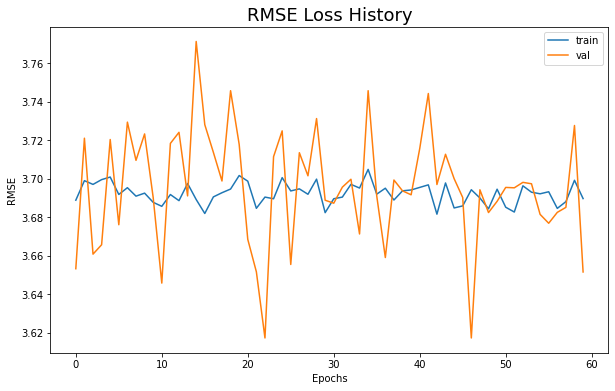

model train time: 11.785

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 1000
EPOCH 1: Avg losses: train: 3.689, val: 3.654
EPOCH 2: Avg losses: train: 3.700, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

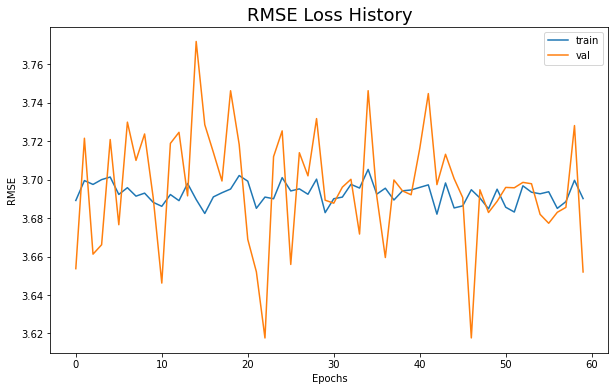

model train time: 13.000

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 2.134, val: 1.105
EPOCH 2: Avg losses: train: 1.057, val: 1.018
EPOCH 3: Avg losses: train: 0.998, val: 0.989
EPOCH 4: Avg losses: train: 0.963, val: 0.955
EPOCH 5: Avg losses: train: 0.945, val: 0.947
EPOCH 6: Avg losses: train: 0.932, val: 0.930
EPOCH 7: Avg losses: train: 0.919, val: 0.918
EPOCH 8: Avg losses: train: 0.910, val: 0.910
EPOCH 9: Avg losses: train: 0.897, val: 0.918
EPOCH 10: Avg losses: train: 0.890, val: 0.902
EPOCH 11: Avg losses: train: 0.884, val: 0.916
EPOCH 12: Avg losses: train: 0.872, val: 0.880
EPOCH 13: Avg losses: train: 0.863, val: 0.899
EPOCH 14: Avg losses: train: 0.858, val: 0.885
EPOCH 15: Avg losses: train: 0.857, val: 0.890
EPOCH 16: Avg losses: train: 0.851, val: 0.882
EPOCH 17: Avg losses: train: 0.846, val: 0.871
EPOCH 18: Avg losses: train: 0.837, val: 0.866
EPOCH 19: Avg losses: train: 0.832, val: 0.861
EPOCH 20: Avg losses: t

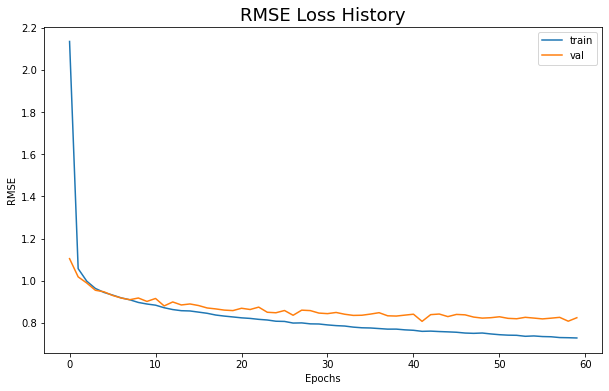

model train time: 13.975

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.01
EPOCH 1: Avg losses: train: 2.362, val: 1.266
EPOCH 2: Avg losses: train: 1.112, val: 1.077
EPOCH 3: Avg losses: train: 1.045, val: 1.078
EPOCH 4: Avg losses: train: 1.041, val: 1.063
EPOCH 5: Avg losses: train: 1.039, val: 1.065
EPOCH 6: Avg losses: train: 1.040, val: 1.040
EPOCH 7: Avg losses: train: 1.035, val: 1.035
EPOCH 8: Avg losses: train: 1.037, val: 1.033
EPOCH 9: Avg losses: train: 1.033, val: 1.051
EPOCH 10: Avg losses: train: 1.033, val: 1.041
EPOCH 11: Avg losses: train: 1.033, val: 1.064
EPOCH 12: Avg losses: train: 1.032, val: 1.022
EPOCH 13: Avg losses: train: 1.027, val: 1.057
EPOCH 14: Avg losses: train: 1.032, val: 1.037
EPOCH 15: Avg losses: train: 1.032, val: 1.037
EPOCH 16: Avg losses: train: 1.033, val: 1.041
EPOCH 17: Avg losses: train: 1.032, val: 1.036
EPOCH 18: Avg losses: train: 1.030, val: 1.038
EPOCH 19: Avg losses: train: 1.030, val: 1.052
EPOCH 20: Avg losses: tr

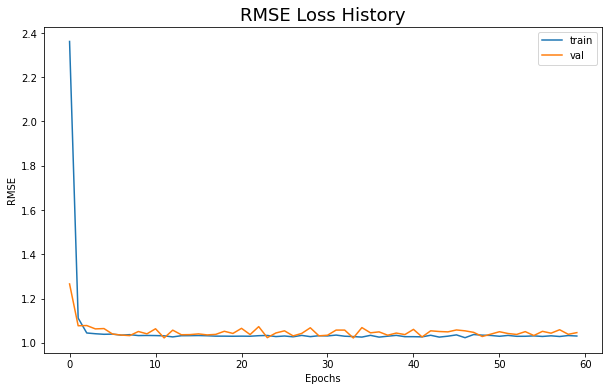

model train time: 13.757

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.1
EPOCH 1: Avg losses: train: 3.438, val: 3.101
EPOCH 2: Avg losses: train: 2.744, val: 2.518
EPOCH 3: Avg losses: train: 2.333, val: 2.297
EPOCH 4: Avg losses: train: 2.185, val: 2.215
EPOCH 5: Avg losses: train: 2.137, val: 2.195
EPOCH 6: Avg losses: train: 2.127, val: 2.153
EPOCH 7: Avg losses: train: 2.124, val: 2.161
EPOCH 8: Avg losses: train: 2.118, val: 2.165
EPOCH 9: Avg losses: train: 2.120, val: 2.192
EPOCH 10: Avg losses: train: 2.121, val: 2.177
EPOCH 11: Avg losses: train: 2.120, val: 2.152
EPOCH 12: Avg losses: train: 2.121, val: 2.135
EPOCH 13: Avg losses: train: 2.117, val: 2.169
EPOCH 14: Avg losses: train: 2.118, val: 2.160
EPOCH 15: Avg losses: train: 2.124, val: 2.167
EPOCH 16: Avg losses: train: 2.122, val: 2.177
EPOCH 17: Avg losses: train: 2.130, val: 2.157
EPOCH 18: Avg losses: train: 2.120, val: 2.175
EPOCH 19: Avg losses: train: 2.125, val: 2.221
EPOCH 20: Avg losses: tra

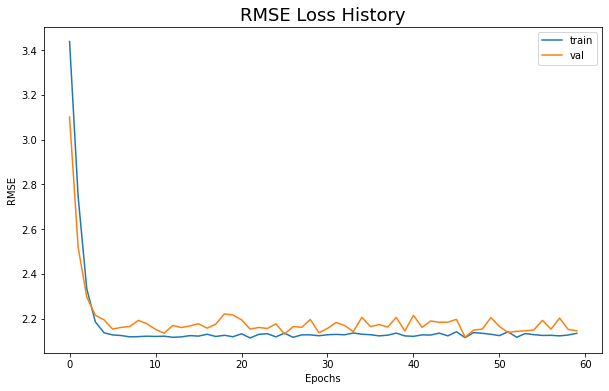

model train time: 14.220

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 1
EPOCH 1: Avg losses: train: 3.666, val: 3.613
EPOCH 2: Avg losses: train: 3.640, val: 3.657
EPOCH 3: Avg losses: train: 3.620, val: 3.579
EPOCH 4: Avg losses: train: 3.607, val: 3.572
EPOCH 5: Avg losses: train: 3.601, val: 3.622
EPOCH 6: Avg losses: train: 3.591, val: 3.575
EPOCH 7: Avg losses: train: 3.594, val: 3.628
EPOCH 8: Avg losses: train: 3.589, val: 3.613
EPOCH 9: Avg losses: train: 3.591, val: 3.625
EPOCH 10: Avg losses: train: 3.586, val: 3.593
EPOCH 11: Avg losses: train: 3.584, val: 3.547
EPOCH 12: Avg losses: train: 3.591, val: 3.617
EPOCH 13: Avg losses: train: 3.587, val: 3.623
EPOCH 14: Avg losses: train: 3.595, val: 3.589
EPOCH 15: Avg losses: train: 3.588, val: 3.671
EPOCH 16: Avg losses: train: 3.580, val: 3.629
EPOCH 17: Avg losses: train: 3.590, val: 3.613
EPOCH 18: Avg losses: train: 3.592, val: 3.601
EPOCH 19: Avg losses: train: 3.594, val: 3.648
EPOCH 20: Avg losses: train

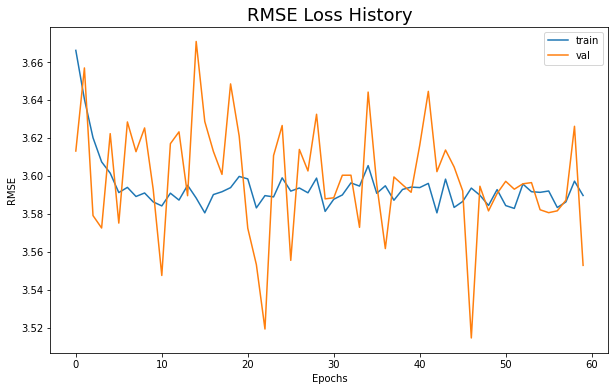

model train time: 13.804

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 100
EPOCH 1: Avg losses: train: 3.686, val: 3.650
EPOCH 2: Avg losses: train: 3.693, val: 3.720
EPOCH 3: Avg losses: train: 3.696, val: 3.660
EPOCH 4: Avg losses: train: 3.699, val: 3.665
EPOCH 5: Avg losses: train: 3.700, val: 3.720
EPOCH 6: Avg losses: train: 3.691, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.709
EPOCH 9: Avg losses: train: 3.692, val: 3.723
EPOCH 10: Avg losses: train: 3.687, val: 3.690
EPOCH 11: Avg losses: train: 3.685, val: 3.645
EPOCH 12: Avg losses: train: 3.691, val: 3.718
EPOCH 13: Avg losses: train: 3.688, val: 3.724
EPOCH 14: Avg losses: train: 3.697, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.681, val: 3.728
EPOCH 17: Avg losses: train: 3.690, val: 3.713
EPOCH 18: Avg losses: train: 3.692, val: 3.698
EPOCH 19: Avg losses: train: 3.694, val: 3.745
EPOCH 20: Avg losses: tra

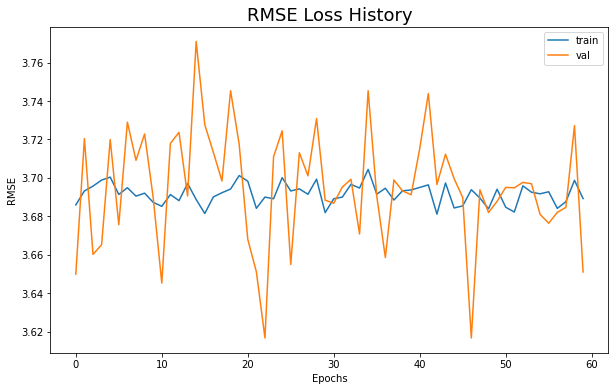

model train time: 13.741

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 1000
EPOCH 1: Avg losses: train: 3.686, val: 3.650
EPOCH 2: Avg losses: train: 3.694, val: 3.721
EPOCH 3: Avg losses: train: 3.696, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

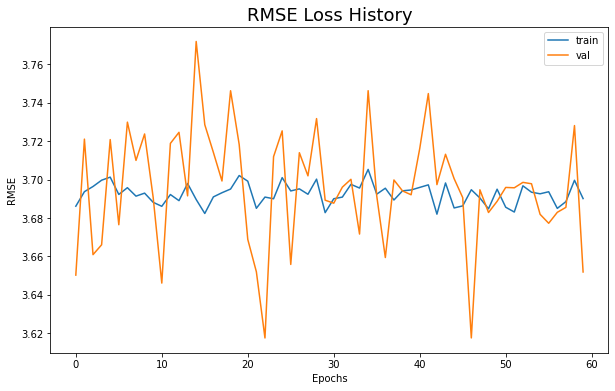

model train time: 13.819

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.571, val: 1.081
EPOCH 2: Avg losses: train: 1.032, val: 0.980
EPOCH 3: Avg losses: train: 0.964, val: 0.969
EPOCH 4: Avg losses: train: 0.939, val: 0.944
EPOCH 5: Avg losses: train: 0.917, val: 0.926
EPOCH 6: Avg losses: train: 0.906, val: 0.904
EPOCH 7: Avg losses: train: 0.891, val: 0.900
EPOCH 8: Avg losses: train: 0.885, val: 0.891
EPOCH 9: Avg losses: train: 0.873, val: 0.899
EPOCH 10: Avg losses: train: 0.863, val: 0.883
EPOCH 11: Avg losses: train: 0.860, val: 0.904
EPOCH 12: Avg losses: train: 0.851, val: 0.869
EPOCH 13: Avg losses: train: 0.841, val: 0.886
EPOCH 14: Avg losses: train: 0.838, val: 0.871
EPOCH 15: Avg losses: train: 0.838, val: 0.882
EPOCH 16: Avg losses: train: 0.835, val: 0.874
EPOCH 17: Avg losses: train: 0.832, val: 0.868
EPOCH 18: Avg losses: train: 0.820, val: 0.858
EPOCH 19: Avg losses: train: 0.818, val: 0.854
EPOCH 20: Avg losses: t

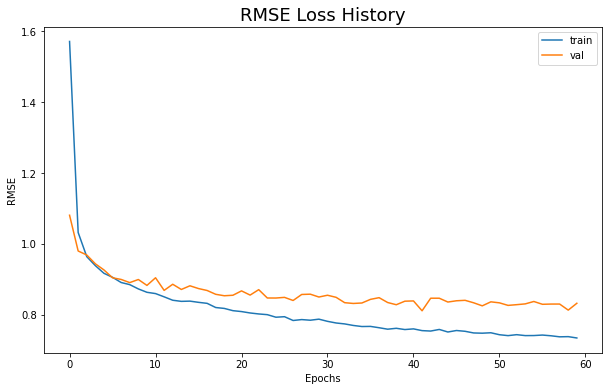

model train time: 14.149

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.01
EPOCH 1: Avg losses: train: 1.632, val: 1.103
EPOCH 2: Avg losses: train: 1.087, val: 1.088
EPOCH 3: Avg losses: train: 1.066, val: 1.102
EPOCH 4: Avg losses: train: 1.071, val: 1.104
EPOCH 5: Avg losses: train: 1.073, val: 1.082
EPOCH 6: Avg losses: train: 1.074, val: 1.074
EPOCH 7: Avg losses: train: 1.074, val: 1.089
EPOCH 8: Avg losses: train: 1.083, val: 1.076
EPOCH 9: Avg losses: train: 1.077, val: 1.074
EPOCH 10: Avg losses: train: 1.071, val: 1.069
EPOCH 11: Avg losses: train: 1.079, val: 1.108
EPOCH 12: Avg losses: train: 1.073, val: 1.072
EPOCH 13: Avg losses: train: 1.073, val: 1.082
EPOCH 14: Avg losses: train: 1.071, val: 1.069
EPOCH 15: Avg losses: train: 1.073, val: 1.082
EPOCH 16: Avg losses: train: 1.077, val: 1.081
EPOCH 17: Avg losses: train: 1.078, val: 1.087
EPOCH 18: Avg losses: train: 1.076, val: 1.084
EPOCH 19: Avg losses: train: 1.074, val: 1.091
EPOCH 20: Avg losses: tr

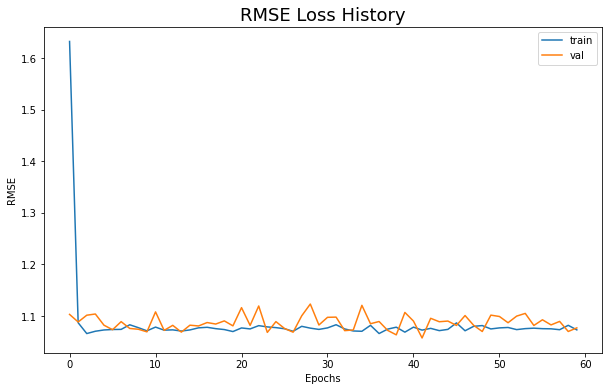

model train time: 13.882

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.1
EPOCH 1: Avg losses: train: 2.844, val: 2.164
EPOCH 2: Avg losses: train: 2.075, val: 2.171
EPOCH 3: Avg losses: train: 2.133, val: 2.183
EPOCH 4: Avg losses: train: 2.135, val: 2.180
EPOCH 5: Avg losses: train: 2.134, val: 2.192
EPOCH 6: Avg losses: train: 2.141, val: 2.160
EPOCH 7: Avg losses: train: 2.143, val: 2.173
EPOCH 8: Avg losses: train: 2.144, val: 2.189
EPOCH 9: Avg losses: train: 2.146, val: 2.194
EPOCH 10: Avg losses: train: 2.142, val: 2.189
EPOCH 11: Avg losses: train: 2.139, val: 2.167
EPOCH 12: Avg losses: train: 2.142, val: 2.193
EPOCH 13: Avg losses: train: 2.141, val: 2.195
EPOCH 14: Avg losses: train: 2.148, val: 2.155
EPOCH 15: Avg losses: train: 2.141, val: 2.200
EPOCH 16: Avg losses: train: 2.147, val: 2.215
EPOCH 17: Avg losses: train: 2.147, val: 2.213
EPOCH 18: Avg losses: train: 2.143, val: 2.219
EPOCH 19: Avg losses: train: 2.146, val: 2.261
EPOCH 20: Avg losses: tra

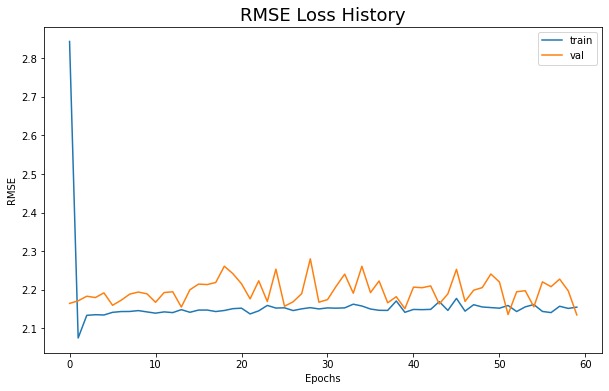

model train time: 14.287

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 1
EPOCH 1: Avg losses: train: 3.637, val: 3.563
EPOCH 2: Avg losses: train: 3.589, val: 3.620
EPOCH 3: Avg losses: train: 3.597, val: 3.565
EPOCH 4: Avg losses: train: 3.598, val: 3.566
EPOCH 5: Avg losses: train: 3.599, val: 3.622
EPOCH 6: Avg losses: train: 3.591, val: 3.573
EPOCH 7: Avg losses: train: 3.594, val: 3.629
EPOCH 8: Avg losses: train: 3.590, val: 3.614
EPOCH 9: Avg losses: train: 3.591, val: 3.626
EPOCH 10: Avg losses: train: 3.587, val: 3.594
EPOCH 11: Avg losses: train: 3.584, val: 3.547
EPOCH 12: Avg losses: train: 3.591, val: 3.618
EPOCH 13: Avg losses: train: 3.588, val: 3.622
EPOCH 14: Avg losses: train: 3.596, val: 3.589
EPOCH 15: Avg losses: train: 3.588, val: 3.671
EPOCH 16: Avg losses: train: 3.581, val: 3.631
EPOCH 17: Avg losses: train: 3.590, val: 3.614
EPOCH 18: Avg losses: train: 3.592, val: 3.601
EPOCH 19: Avg losses: train: 3.594, val: 3.649
EPOCH 20: Avg losses: train

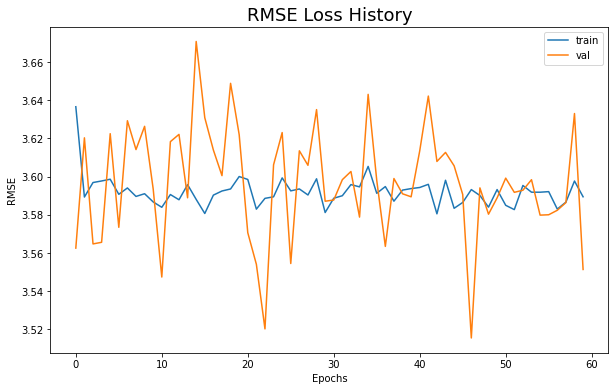

model train time: 14.024

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 100
EPOCH 1: Avg losses: train: 3.688, val: 3.655
EPOCH 2: Avg losses: train: 3.698, val: 3.721
EPOCH 3: Avg losses: train: 3.697, val: 3.660
EPOCH 4: Avg losses: train: 3.699, val: 3.665
EPOCH 5: Avg losses: train: 3.700, val: 3.720
EPOCH 6: Avg losses: train: 3.691, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.709
EPOCH 9: Avg losses: train: 3.692, val: 3.723
EPOCH 10: Avg losses: train: 3.687, val: 3.690
EPOCH 11: Avg losses: train: 3.685, val: 3.645
EPOCH 12: Avg losses: train: 3.691, val: 3.718
EPOCH 13: Avg losses: train: 3.688, val: 3.724
EPOCH 14: Avg losses: train: 3.697, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.681, val: 3.728
EPOCH 17: Avg losses: train: 3.690, val: 3.713
EPOCH 18: Avg losses: train: 3.692, val: 3.698
EPOCH 19: Avg losses: train: 3.694, val: 3.745
EPOCH 20: Avg losses: tra

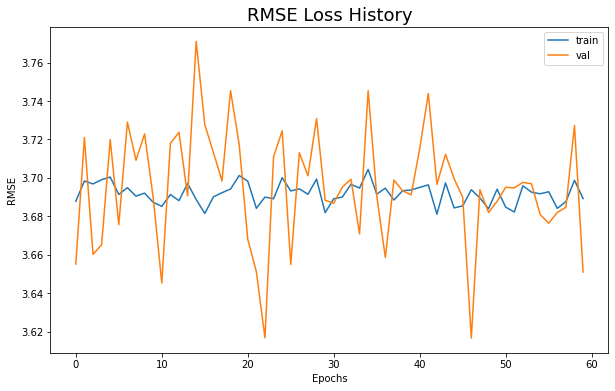

model train time: 14.056

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 1000
EPOCH 1: Avg losses: train: 3.688, val: 3.656
EPOCH 2: Avg losses: train: 3.699, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

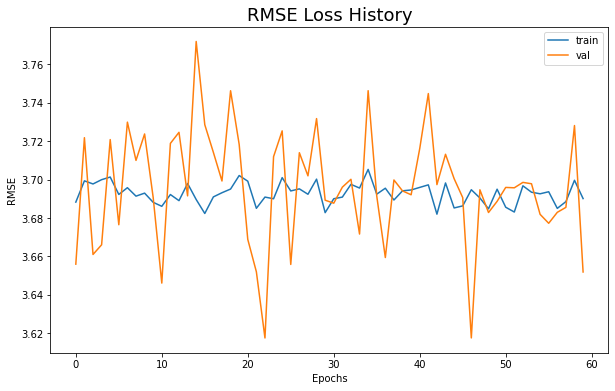

model train time: 14.119

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.481, val: 1.074
EPOCH 2: Avg losses: train: 1.023, val: 0.982
EPOCH 3: Avg losses: train: 0.964, val: 0.964
EPOCH 4: Avg losses: train: 0.942, val: 0.945
EPOCH 5: Avg losses: train: 0.929, val: 0.934
EPOCH 6: Avg losses: train: 0.922, val: 0.913
EPOCH 7: Avg losses: train: 0.907, val: 0.915
EPOCH 8: Avg losses: train: 0.905, val: 0.906
EPOCH 9: Avg losses: train: 0.899, val: 0.919
EPOCH 10: Avg losses: train: 0.889, val: 0.899
EPOCH 11: Avg losses: train: 0.887, val: 0.919
EPOCH 12: Avg losses: train: 0.881, val: 0.900
EPOCH 13: Avg losses: train: 0.876, val: 0.902
EPOCH 14: Avg losses: train: 0.873, val: 0.893
EPOCH 15: Avg losses: train: 0.878, val: 0.913
EPOCH 16: Avg losses: train: 0.878, val: 0.904
EPOCH 17: Avg losses: train: 0.878, val: 0.903
EPOCH 18: Avg losses: train: 0.866, val: 0.887
EPOCH 19: Avg losses: train: 0.863, val: 0.874
EPOCH 20: Avg losses: t

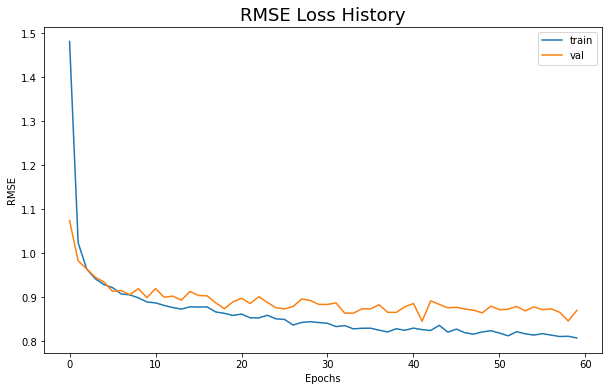

model train time: 13.867

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.01
EPOCH 1: Avg losses: train: 1.506, val: 1.160
EPOCH 2: Avg losses: train: 1.112, val: 1.107
EPOCH 3: Avg losses: train: 1.103, val: 1.127
EPOCH 4: Avg losses: train: 1.110, val: 1.135
EPOCH 5: Avg losses: train: 1.112, val: 1.119
EPOCH 6: Avg losses: train: 1.112, val: 1.110
EPOCH 7: Avg losses: train: 1.117, val: 1.160
EPOCH 8: Avg losses: train: 1.122, val: 1.128
EPOCH 9: Avg losses: train: 1.117, val: 1.113
EPOCH 10: Avg losses: train: 1.114, val: 1.113
EPOCH 11: Avg losses: train: 1.115, val: 1.142
EPOCH 12: Avg losses: train: 1.115, val: 1.126
EPOCH 13: Avg losses: train: 1.107, val: 1.121
EPOCH 14: Avg losses: train: 1.111, val: 1.100
EPOCH 15: Avg losses: train: 1.113, val: 1.127
EPOCH 16: Avg losses: train: 1.114, val: 1.119
EPOCH 17: Avg losses: train: 1.118, val: 1.118
EPOCH 18: Avg losses: train: 1.117, val: 1.129
EPOCH 19: Avg losses: train: 1.115, val: 1.117
EPOCH 20: Avg losses: tr

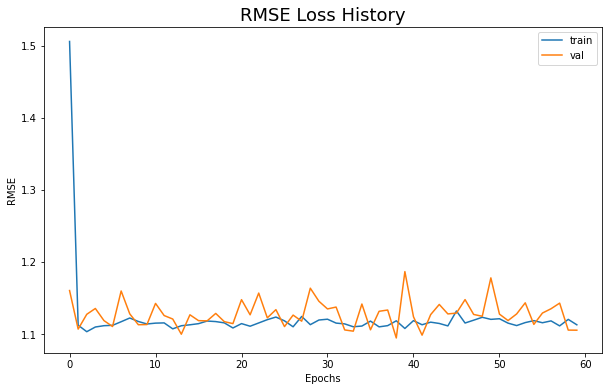

model train time: 13.851

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.1
EPOCH 1: Avg losses: train: 2.525, val: 2.058
EPOCH 2: Avg losses: train: 2.119, val: 2.265
EPOCH 3: Avg losses: train: 2.147, val: 2.164
EPOCH 4: Avg losses: train: 2.152, val: 2.198
EPOCH 5: Avg losses: train: 2.153, val: 2.219
EPOCH 6: Avg losses: train: 2.161, val: 2.205
EPOCH 7: Avg losses: train: 2.161, val: 2.180
EPOCH 8: Avg losses: train: 2.160, val: 2.216
EPOCH 9: Avg losses: train: 2.162, val: 2.209
EPOCH 10: Avg losses: train: 2.159, val: 2.207
EPOCH 11: Avg losses: train: 2.152, val: 2.187
EPOCH 12: Avg losses: train: 2.162, val: 2.253
EPOCH 13: Avg losses: train: 2.158, val: 2.215
EPOCH 14: Avg losses: train: 2.170, val: 2.172
EPOCH 15: Avg losses: train: 2.163, val: 2.232
EPOCH 16: Avg losses: train: 2.173, val: 2.226
EPOCH 17: Avg losses: train: 2.173, val: 2.260
EPOCH 18: Avg losses: train: 2.163, val: 2.235
EPOCH 19: Avg losses: train: 2.170, val: 2.293
EPOCH 20: Avg losses: tra

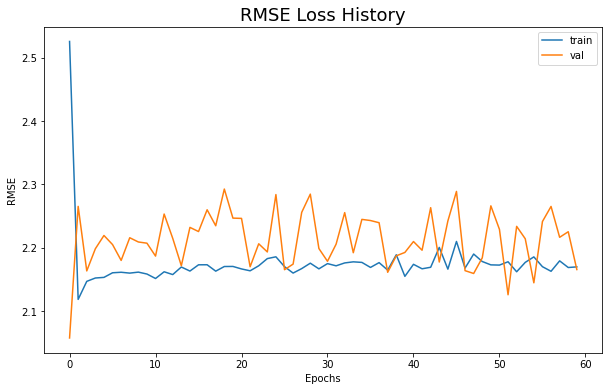

model train time: 14.150

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 1
EPOCH 1: Avg losses: train: 3.614, val: 3.535
EPOCH 2: Avg losses: train: 3.590, val: 3.634
EPOCH 3: Avg losses: train: 3.597, val: 3.562
EPOCH 4: Avg losses: train: 3.598, val: 3.565
EPOCH 5: Avg losses: train: 3.599, val: 3.622
EPOCH 6: Avg losses: train: 3.590, val: 3.573
EPOCH 7: Avg losses: train: 3.594, val: 3.631
EPOCH 8: Avg losses: train: 3.590, val: 3.616
EPOCH 9: Avg losses: train: 3.591, val: 3.627
EPOCH 10: Avg losses: train: 3.587, val: 3.594
EPOCH 11: Avg losses: train: 3.584, val: 3.547
EPOCH 12: Avg losses: train: 3.590, val: 3.621
EPOCH 13: Avg losses: train: 3.588, val: 3.623
EPOCH 14: Avg losses: train: 3.596, val: 3.587
EPOCH 15: Avg losses: train: 3.588, val: 3.670
EPOCH 16: Avg losses: train: 3.581, val: 3.632
EPOCH 17: Avg losses: train: 3.590, val: 3.615
EPOCH 18: Avg losses: train: 3.592, val: 3.599
EPOCH 19: Avg losses: train: 3.594, val: 3.647
EPOCH 20: Avg losses: train

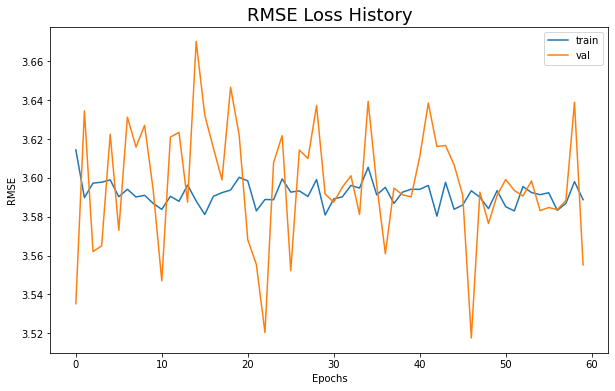

model train time: 13.631

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 100
EPOCH 1: Avg losses: train: 3.691, val: 3.654
EPOCH 2: Avg losses: train: 3.697, val: 3.722
EPOCH 3: Avg losses: train: 3.697, val: 3.660
EPOCH 4: Avg losses: train: 3.699, val: 3.665
EPOCH 5: Avg losses: train: 3.700, val: 3.720
EPOCH 6: Avg losses: train: 3.691, val: 3.676
EPOCH 7: Avg losses: train: 3.695, val: 3.729
EPOCH 8: Avg losses: train: 3.691, val: 3.709
EPOCH 9: Avg losses: train: 3.692, val: 3.723
EPOCH 10: Avg losses: train: 3.687, val: 3.690
EPOCH 11: Avg losses: train: 3.685, val: 3.645
EPOCH 12: Avg losses: train: 3.691, val: 3.718
EPOCH 13: Avg losses: train: 3.688, val: 3.724
EPOCH 14: Avg losses: train: 3.697, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.771
EPOCH 16: Avg losses: train: 3.681, val: 3.728
EPOCH 17: Avg losses: train: 3.690, val: 3.713
EPOCH 18: Avg losses: train: 3.692, val: 3.698
EPOCH 19: Avg losses: train: 3.694, val: 3.745
EPOCH 20: Avg losses: tra

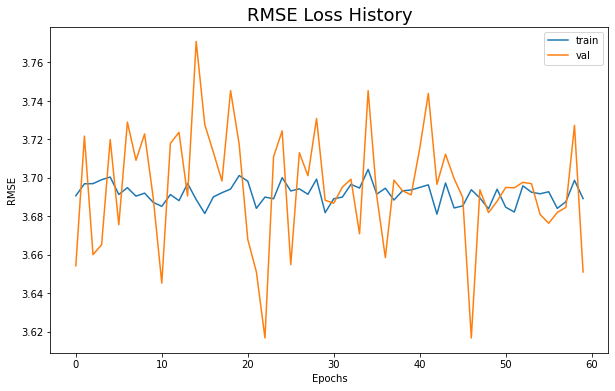

model train time: 13.804

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 1000
EPOCH 1: Avg losses: train: 3.691, val: 3.655
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

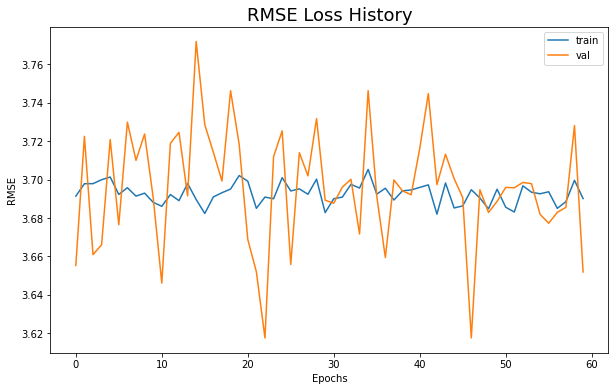

model train time: 13.820

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.678, val: 1.107
EPOCH 2: Avg losses: train: 1.018, val: 0.974
EPOCH 3: Avg losses: train: 0.951, val: 0.961
EPOCH 4: Avg losses: train: 0.923, val: 0.932
EPOCH 5: Avg losses: train: 0.902, val: 0.922
EPOCH 6: Avg losses: train: 0.884, val: 0.893
EPOCH 7: Avg losses: train: 0.862, val: 0.883
EPOCH 8: Avg losses: train: 0.849, val: 0.873
EPOCH 9: Avg losses: train: 0.834, val: 0.878
EPOCH 10: Avg losses: train: 0.822, val: 0.870
EPOCH 11: Avg losses: train: 0.814, val: 0.879
EPOCH 12: Avg losses: train: 0.802, val: 0.845
EPOCH 13: Avg losses: train: 0.790, val: 0.860
EPOCH 14: Avg losses: train: 0.781, val: 0.844
EPOCH 15: Avg losses: train: 0.777, val: 0.852
EPOCH 16: Avg losses: train: 0.773, val: 0.849
EPOCH 17: Avg losses: train: 0.768, val: 0.833
EPOCH 18: Avg losses: train: 0.752, val: 0.828
EPOCH 19: Avg losses: train: 0.745, val: 0.817
EPOCH 20: Avg losses: t

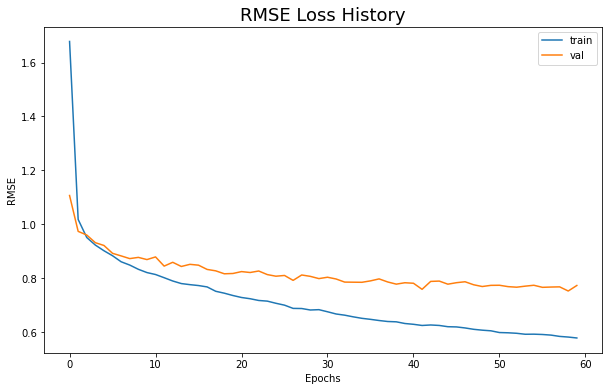

model train time: 26.625

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.01
EPOCH 1: Avg losses: train: 1.742, val: 1.144
EPOCH 2: Avg losses: train: 1.044, val: 1.022
EPOCH 3: Avg losses: train: 1.009, val: 1.049
EPOCH 4: Avg losses: train: 1.006, val: 1.035
EPOCH 5: Avg losses: train: 1.007, val: 1.028
EPOCH 6: Avg losses: train: 1.010, val: 1.020
EPOCH 7: Avg losses: train: 1.010, val: 1.014
EPOCH 8: Avg losses: train: 1.015, val: 1.006
EPOCH 9: Avg losses: train: 1.010, val: 1.022
EPOCH 10: Avg losses: train: 1.008, val: 1.008
EPOCH 11: Avg losses: train: 1.012, val: 1.041
EPOCH 12: Avg losses: train: 1.010, val: 1.001
EPOCH 13: Avg losses: train: 1.006, val: 1.025
EPOCH 14: Avg losses: train: 1.004, val: 1.010
EPOCH 15: Avg losses: train: 1.010, val: 1.022
EPOCH 16: Avg losses: train: 1.009, val: 1.022
EPOCH 17: Avg losses: train: 1.014, val: 1.018
EPOCH 18: Avg losses: train: 1.009, val: 1.022
EPOCH 19: Avg losses: train: 1.005, val: 1.019
EPOCH 20: Avg losses: tr

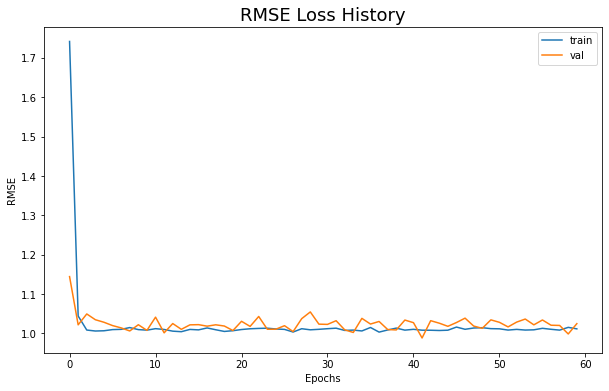

model train time: 26.604

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.1
EPOCH 1: Avg losses: train: 2.893, val: 2.010
EPOCH 2: Avg losses: train: 1.683, val: 1.603
EPOCH 3: Avg losses: train: 1.515, val: 1.592
EPOCH 4: Avg losses: train: 1.516, val: 1.616
EPOCH 5: Avg losses: train: 1.535, val: 1.601
EPOCH 6: Avg losses: train: 1.526, val: 1.574
EPOCH 7: Avg losses: train: 1.535, val: 1.568
EPOCH 8: Avg losses: train: 1.544, val: 1.546
EPOCH 9: Avg losses: train: 1.536, val: 1.588
EPOCH 10: Avg losses: train: 1.535, val: 1.580
EPOCH 11: Avg losses: train: 1.535, val: 1.606
EPOCH 12: Avg losses: train: 1.534, val: 1.561
EPOCH 13: Avg losses: train: 1.533, val: 1.579
EPOCH 14: Avg losses: train: 1.540, val: 1.560
EPOCH 15: Avg losses: train: 1.528, val: 1.558
EPOCH 16: Avg losses: train: 1.546, val: 1.585
EPOCH 17: Avg losses: train: 1.533, val: 1.578
EPOCH 18: Avg losses: train: 1.535, val: 1.586
EPOCH 19: Avg losses: train: 1.543, val: 1.604
EPOCH 20: Avg losses: tra

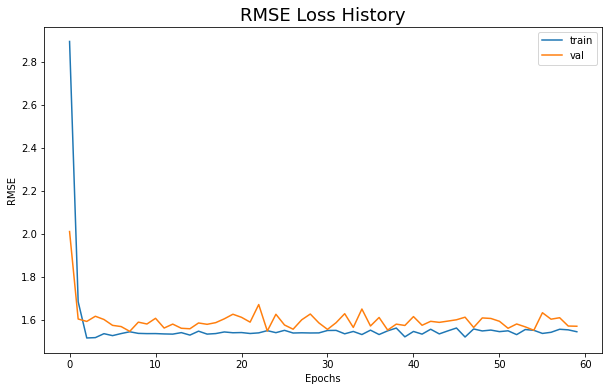

model train time: 27.061

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 1
EPOCH 1: Avg losses: train: 3.642, val: 3.532
EPOCH 2: Avg losses: train: 3.519, val: 3.511
EPOCH 3: Avg losses: train: 3.463, val: 3.427
EPOCH 4: Avg losses: train: 3.453, val: 3.429
EPOCH 5: Avg losses: train: 3.456, val: 3.485
EPOCH 6: Avg losses: train: 3.451, val: 3.434
EPOCH 7: Avg losses: train: 3.454, val: 3.487
EPOCH 8: Avg losses: train: 3.449, val: 3.479
EPOCH 9: Avg losses: train: 3.451, val: 3.489
EPOCH 10: Avg losses: train: 3.446, val: 3.458
EPOCH 11: Avg losses: train: 3.444, val: 3.411
EPOCH 12: Avg losses: train: 3.451, val: 3.476
EPOCH 13: Avg losses: train: 3.447, val: 3.482
EPOCH 14: Avg losses: train: 3.454, val: 3.450
EPOCH 15: Avg losses: train: 3.449, val: 3.530
EPOCH 16: Avg losses: train: 3.440, val: 3.491
EPOCH 17: Avg losses: train: 3.452, val: 3.472
EPOCH 18: Avg losses: train: 3.452, val: 3.465
EPOCH 19: Avg losses: train: 3.454, val: 3.513
EPOCH 20: Avg losses: train

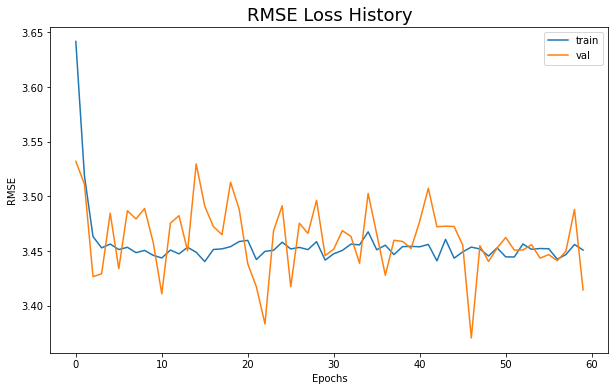

model train time: 26.779

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 100
EPOCH 1: Avg losses: train: 3.708, val: 3.661
EPOCH 2: Avg losses: train: 3.698, val: 3.720
EPOCH 3: Avg losses: train: 3.696, val: 3.659
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.699, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.689, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.688
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.722
EPOCH 14: Avg losses: train: 3.696, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.770
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.697
EPOCH 19: Avg losses: train: 3.693, val: 3.744
EPOCH 20: Avg losses: tra

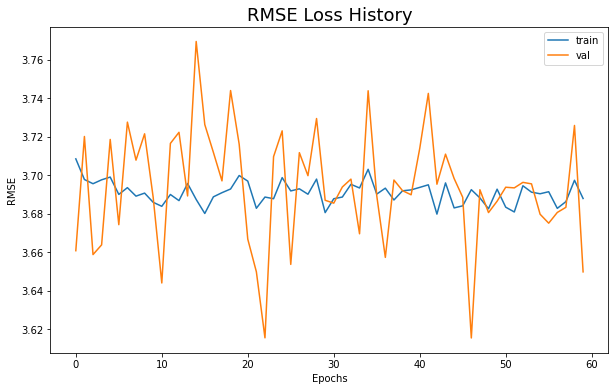

model train time: 26.639

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 1000
EPOCH 1: Avg losses: train: 3.709, val: 3.662
EPOCH 2: Avg losses: train: 3.699, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

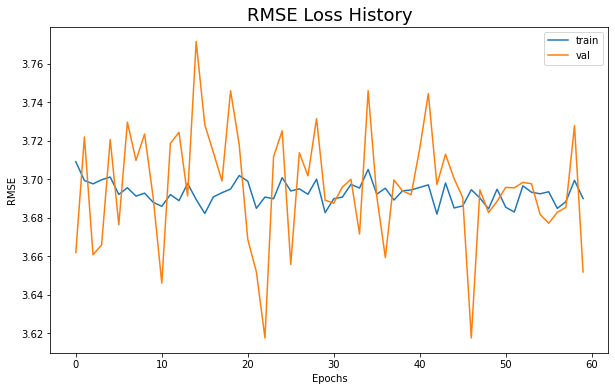

model train time: 26.812

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.421, val: 1.069
EPOCH 2: Avg losses: train: 1.009, val: 0.969
EPOCH 3: Avg losses: train: 0.942, val: 0.954
EPOCH 4: Avg losses: train: 0.924, val: 0.936
EPOCH 5: Avg losses: train: 0.908, val: 0.922
EPOCH 6: Avg losses: train: 0.898, val: 0.903
EPOCH 7: Avg losses: train: 0.881, val: 0.894
EPOCH 8: Avg losses: train: 0.877, val: 0.885
EPOCH 9: Avg losses: train: 0.866, val: 0.899
EPOCH 10: Avg losses: train: 0.856, val: 0.882
EPOCH 11: Avg losses: train: 0.850, val: 0.901
EPOCH 12: Avg losses: train: 0.840, val: 0.878
EPOCH 13: Avg losses: train: 0.831, val: 0.873
EPOCH 14: Avg losses: train: 0.826, val: 0.873
EPOCH 15: Avg losses: train: 0.829, val: 0.889
EPOCH 16: Avg losses: train: 0.831, val: 0.871
EPOCH 17: Avg losses: train: 0.819, val: 0.869
EPOCH 18: Avg losses: train: 0.803, val: 0.861
EPOCH 19: Avg losses: train: 0.806, val: 0.842
EPOCH 20: Avg losses: t

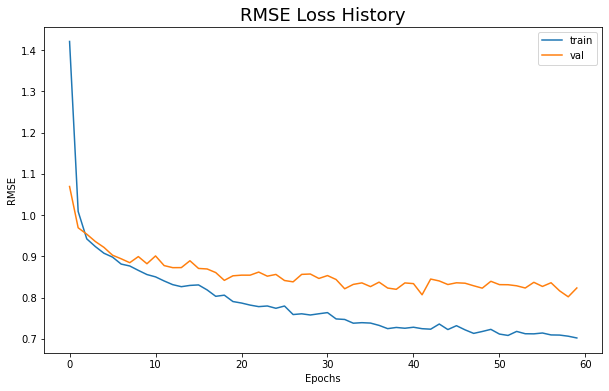

model train time: 26.690

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.01
EPOCH 1: Avg losses: train: 1.438, val: 1.125
EPOCH 2: Avg losses: train: 1.086, val: 1.061
EPOCH 3: Avg losses: train: 1.063, val: 1.088
EPOCH 4: Avg losses: train: 1.068, val: 1.093
EPOCH 5: Avg losses: train: 1.073, val: 1.092
EPOCH 6: Avg losses: train: 1.075, val: 1.072
EPOCH 7: Avg losses: train: 1.081, val: 1.073
EPOCH 8: Avg losses: train: 1.078, val: 1.096
EPOCH 9: Avg losses: train: 1.074, val: 1.079
EPOCH 10: Avg losses: train: 1.069, val: 1.065
EPOCH 11: Avg losses: train: 1.069, val: 1.112
EPOCH 12: Avg losses: train: 1.079, val: 1.070
EPOCH 13: Avg losses: train: 1.064, val: 1.068
EPOCH 14: Avg losses: train: 1.072, val: 1.053
EPOCH 15: Avg losses: train: 1.071, val: 1.078
EPOCH 16: Avg losses: train: 1.078, val: 1.104
EPOCH 17: Avg losses: train: 1.095, val: 1.088
EPOCH 18: Avg losses: train: 1.072, val: 1.092
EPOCH 19: Avg losses: train: 1.072, val: 1.071
EPOCH 20: Avg losses: tr

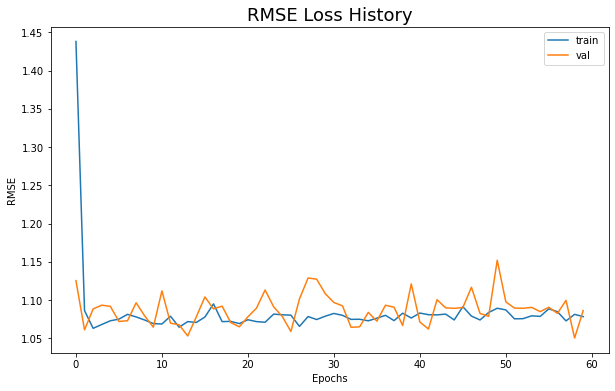

model train time: 26.765

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.1
EPOCH 1: Avg losses: train: 2.034, val: 1.552
EPOCH 2: Avg losses: train: 1.570, val: 1.634
EPOCH 3: Avg losses: train: 1.573, val: 1.603
EPOCH 4: Avg losses: train: 1.603, val: 1.683
EPOCH 5: Avg losses: train: 1.605, val: 1.646
EPOCH 6: Avg losses: train: 1.604, val: 1.684
EPOCH 7: Avg losses: train: 1.612, val: 1.696
EPOCH 8: Avg losses: train: 1.608, val: 1.644
EPOCH 9: Avg losses: train: 1.612, val: 1.614
EPOCH 10: Avg losses: train: 1.608, val: 1.657
EPOCH 11: Avg losses: train: 1.602, val: 1.661
EPOCH 12: Avg losses: train: 1.617, val: 1.698
EPOCH 13: Avg losses: train: 1.604, val: 1.709
EPOCH 14: Avg losses: train: 1.621, val: 1.598
EPOCH 15: Avg losses: train: 1.603, val: 1.745
EPOCH 16: Avg losses: train: 1.627, val: 1.643
EPOCH 17: Avg losses: train: 1.616, val: 1.695
EPOCH 18: Avg losses: train: 1.610, val: 1.690
EPOCH 19: Avg losses: train: 1.626, val: 1.728
EPOCH 20: Avg losses: tra

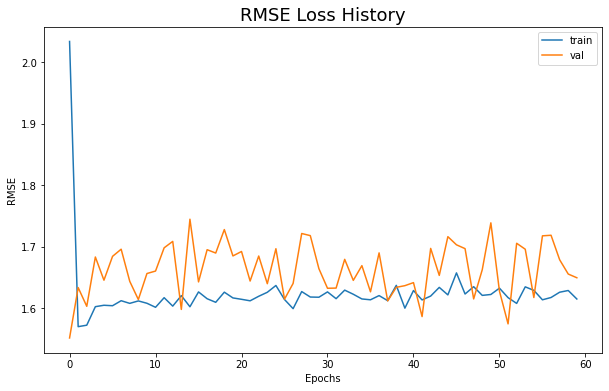

model train time: 26.998

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 1
EPOCH 1: Avg losses: train: 3.524, val: 3.370
EPOCH 2: Avg losses: train: 3.438, val: 3.511
EPOCH 3: Avg losses: train: 3.460, val: 3.424
EPOCH 4: Avg losses: train: 3.457, val: 3.427
EPOCH 5: Avg losses: train: 3.458, val: 3.486
EPOCH 6: Avg losses: train: 3.450, val: 3.431
EPOCH 7: Avg losses: train: 3.454, val: 3.491
EPOCH 8: Avg losses: train: 3.451, val: 3.482
EPOCH 9: Avg losses: train: 3.451, val: 3.492
EPOCH 10: Avg losses: train: 3.447, val: 3.458
EPOCH 11: Avg losses: train: 3.443, val: 3.411
EPOCH 12: Avg losses: train: 3.451, val: 3.486
EPOCH 13: Avg losses: train: 3.449, val: 3.481
EPOCH 14: Avg losses: train: 3.457, val: 3.444
EPOCH 15: Avg losses: train: 3.448, val: 3.531
EPOCH 16: Avg losses: train: 3.442, val: 3.497
EPOCH 17: Avg losses: train: 3.452, val: 3.479
EPOCH 18: Avg losses: train: 3.454, val: 3.462
EPOCH 19: Avg losses: train: 3.454, val: 3.516
EPOCH 20: Avg losses: train

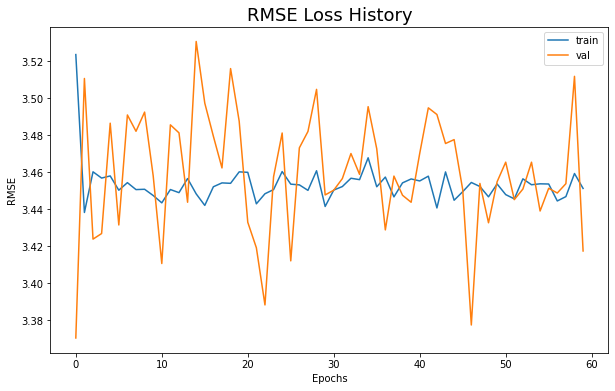

model train time: 26.732

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 100
EPOCH 1: Avg losses: train: 3.695, val: 3.648
EPOCH 2: Avg losses: train: 3.696, val: 3.720
EPOCH 3: Avg losses: train: 3.696, val: 3.659
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.699, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.689, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.688
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.722
EPOCH 14: Avg losses: train: 3.696, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.770
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.697
EPOCH 19: Avg losses: train: 3.693, val: 3.744
EPOCH 20: Avg losses: tra

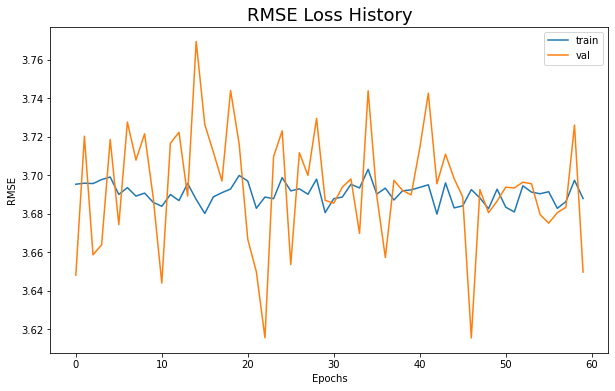

model train time: 26.857

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 1000
EPOCH 1: Avg losses: train: 3.697, val: 3.650
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

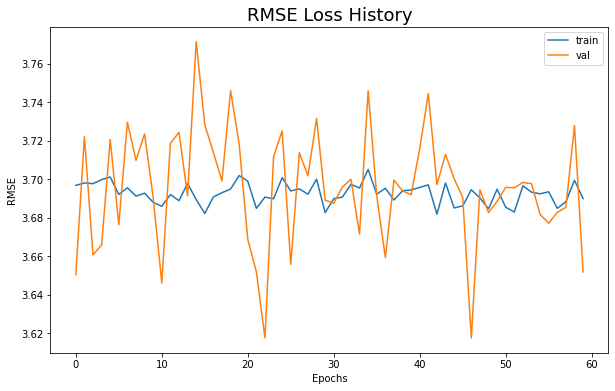

model train time: 26.544

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.411, val: 1.058
EPOCH 2: Avg losses: train: 1.025, val: 0.969
EPOCH 3: Avg losses: train: 0.971, val: 0.980
EPOCH 4: Avg losses: train: 0.955, val: 0.961
EPOCH 5: Avg losses: train: 0.939, val: 0.946
EPOCH 6: Avg losses: train: 0.935, val: 0.927
EPOCH 7: Avg losses: train: 0.923, val: 0.922
EPOCH 8: Avg losses: train: 0.920, val: 0.919
EPOCH 9: Avg losses: train: 0.911, val: 0.935
EPOCH 10: Avg losses: train: 0.906, val: 0.917
EPOCH 11: Avg losses: train: 0.903, val: 0.938
EPOCH 12: Avg losses: train: 0.902, val: 0.922
EPOCH 13: Avg losses: train: 0.892, val: 0.918
EPOCH 14: Avg losses: train: 0.897, val: 0.906
EPOCH 15: Avg losses: train: 0.895, val: 0.922
EPOCH 16: Avg losses: train: 0.897, val: 0.919
EPOCH 17: Avg losses: train: 0.894, val: 0.907
EPOCH 18: Avg losses: train: 0.880, val: 0.903
EPOCH 19: Avg losses: train: 0.885, val: 0.888
EPOCH 20: Avg losses: t

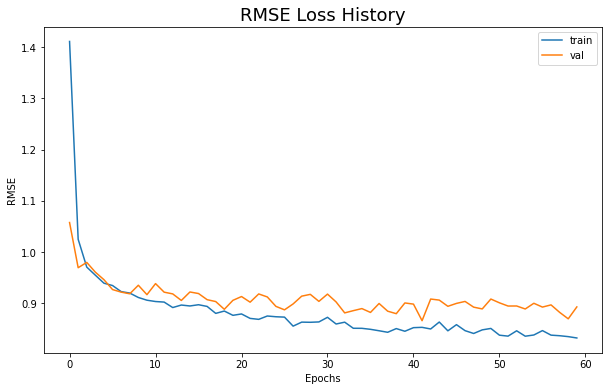

model train time: 27.192

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.01
EPOCH 1: Avg losses: train: 1.412, val: 1.157
EPOCH 2: Avg losses: train: 1.124, val: 1.107
EPOCH 3: Avg losses: train: 1.101, val: 1.122
EPOCH 4: Avg losses: train: 1.105, val: 1.141
EPOCH 5: Avg losses: train: 1.120, val: 1.130
EPOCH 6: Avg losses: train: 1.121, val: 1.114
EPOCH 7: Avg losses: train: 1.120, val: 1.111
EPOCH 8: Avg losses: train: 1.118, val: 1.142
EPOCH 9: Avg losses: train: 1.110, val: 1.115
EPOCH 10: Avg losses: train: 1.123, val: 1.113
EPOCH 11: Avg losses: train: 1.120, val: 1.170
EPOCH 12: Avg losses: train: 1.127, val: 1.100
EPOCH 13: Avg losses: train: 1.109, val: 1.130
EPOCH 14: Avg losses: train: 1.124, val: 1.086
EPOCH 15: Avg losses: train: 1.118, val: 1.154
EPOCH 16: Avg losses: train: 1.122, val: 1.180
EPOCH 17: Avg losses: train: 1.137, val: 1.130
EPOCH 18: Avg losses: train: 1.114, val: 1.139
EPOCH 19: Avg losses: train: 1.119, val: 1.118
EPOCH 20: Avg losses: tr

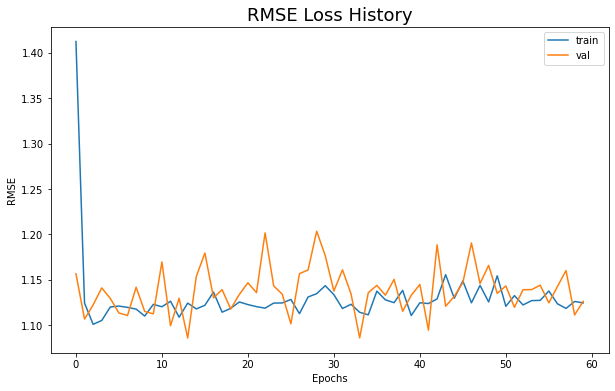

model train time: 26.810

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.1
EPOCH 1: Avg losses: train: 1.855, val: 1.676
EPOCH 2: Avg losses: train: 1.657, val: 1.642
EPOCH 3: Avg losses: train: 1.622, val: 1.723
EPOCH 4: Avg losses: train: 1.675, val: 1.723
EPOCH 5: Avg losses: train: 1.668, val: 1.704
EPOCH 6: Avg losses: train: 1.683, val: 1.743
EPOCH 7: Avg losses: train: 1.672, val: 1.791
EPOCH 8: Avg losses: train: 1.677, val: 1.650
EPOCH 9: Avg losses: train: 1.659, val: 1.699
EPOCH 10: Avg losses: train: 1.677, val: 1.721
EPOCH 11: Avg losses: train: 1.656, val: 1.740
EPOCH 12: Avg losses: train: 1.678, val: 1.721
EPOCH 13: Avg losses: train: 1.667, val: 1.737
EPOCH 14: Avg losses: train: 1.675, val: 1.642
EPOCH 15: Avg losses: train: 1.677, val: 1.852
EPOCH 16: Avg losses: train: 1.698, val: 1.688
EPOCH 17: Avg losses: train: 1.695, val: 1.757
EPOCH 18: Avg losses: train: 1.673, val: 1.769
EPOCH 19: Avg losses: train: 1.687, val: 1.793
EPOCH 20: Avg losses: tra

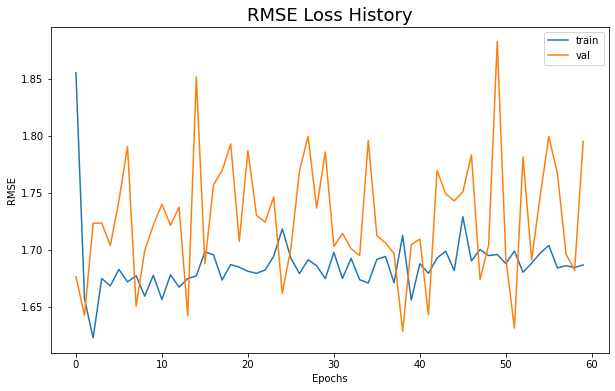

model train time: 26.872

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 1
EPOCH 1: Avg losses: train: 3.470, val: 3.404
EPOCH 2: Avg losses: train: 3.464, val: 3.490
EPOCH 3: Avg losses: train: 3.457, val: 3.423
EPOCH 4: Avg losses: train: 3.456, val: 3.425
EPOCH 5: Avg losses: train: 3.459, val: 3.486
EPOCH 6: Avg losses: train: 3.450, val: 3.433
EPOCH 7: Avg losses: train: 3.454, val: 3.504
EPOCH 8: Avg losses: train: 3.452, val: 3.488
EPOCH 9: Avg losses: train: 3.451, val: 3.492
EPOCH 10: Avg losses: train: 3.448, val: 3.460
EPOCH 11: Avg losses: train: 3.444, val: 3.410
EPOCH 12: Avg losses: train: 3.452, val: 3.492
EPOCH 13: Avg losses: train: 3.449, val: 3.487
EPOCH 14: Avg losses: train: 3.457, val: 3.443
EPOCH 15: Avg losses: train: 3.448, val: 3.534
EPOCH 16: Avg losses: train: 3.443, val: 3.499
EPOCH 17: Avg losses: train: 3.453, val: 3.480
EPOCH 18: Avg losses: train: 3.454, val: 3.459
EPOCH 19: Avg losses: train: 3.455, val: 3.507
EPOCH 20: Avg losses: train

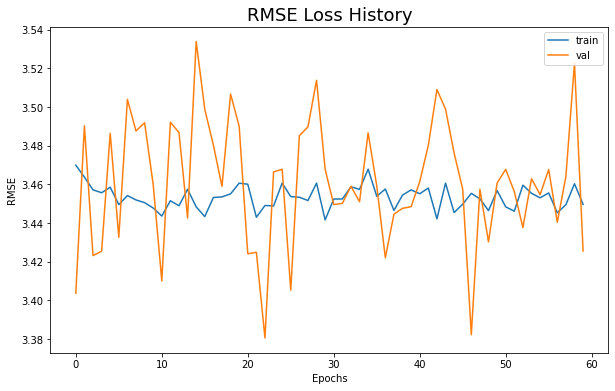

model train time: 26.794

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 100
EPOCH 1: Avg losses: train: 3.692, val: 3.654
EPOCH 2: Avg losses: train: 3.696, val: 3.719
EPOCH 3: Avg losses: train: 3.696, val: 3.658
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.699, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.689, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.688
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.722
EPOCH 14: Avg losses: train: 3.696, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.770
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.697
EPOCH 19: Avg losses: train: 3.693, val: 3.744
EPOCH 20: Avg losses: tra

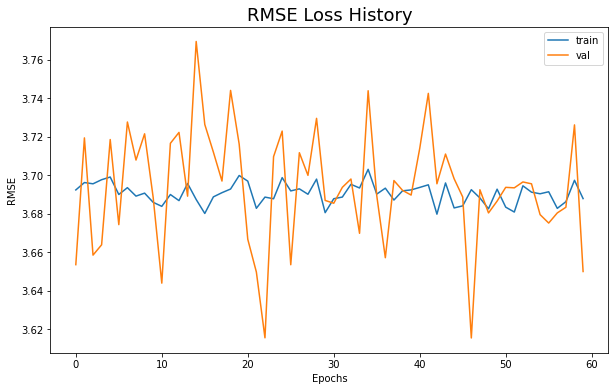

model train time: 26.968

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 1000
EPOCH 1: Avg losses: train: 3.694, val: 3.656
EPOCH 2: Avg losses: train: 3.698, val: 3.721
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

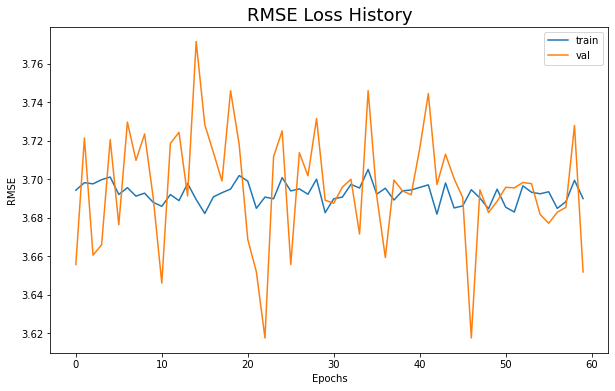

model train time: 27.093

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.632, val: 1.088
EPOCH 2: Avg losses: train: 1.009, val: 0.961
EPOCH 3: Avg losses: train: 0.943, val: 0.958
EPOCH 4: Avg losses: train: 0.915, val: 0.930
EPOCH 5: Avg losses: train: 0.891, val: 0.912
EPOCH 6: Avg losses: train: 0.873, val: 0.888
EPOCH 7: Avg losses: train: 0.852, val: 0.879
EPOCH 8: Avg losses: train: 0.843, val: 0.872
EPOCH 9: Avg losses: train: 0.828, val: 0.876
EPOCH 10: Avg losses: train: 0.814, val: 0.873
EPOCH 11: Avg losses: train: 0.807, val: 0.878
EPOCH 12: Avg losses: train: 0.793, val: 0.844
EPOCH 13: Avg losses: train: 0.780, val: 0.858
EPOCH 14: Avg losses: train: 0.771, val: 0.844
EPOCH 15: Avg losses: train: 0.767, val: 0.848
EPOCH 16: Avg losses: train: 0.762, val: 0.837
EPOCH 17: Avg losses: train: 0.754, val: 0.828
EPOCH 18: Avg losses: train: 0.738, val: 0.828
EPOCH 19: Avg losses: train: 0.732, val: 0.814
EPOCH 20: Avg losses: t

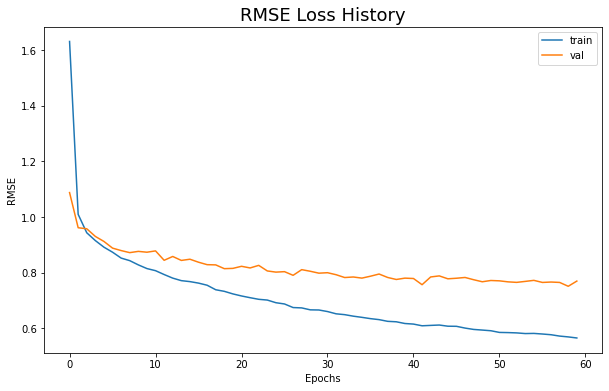

model train time: 29.635

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 0.01
EPOCH 1: Avg losses: train: 1.676, val: 1.111
EPOCH 2: Avg losses: train: 1.037, val: 1.016
EPOCH 3: Avg losses: train: 1.004, val: 1.038
EPOCH 4: Avg losses: train: 1.002, val: 1.030
EPOCH 5: Avg losses: train: 1.004, val: 1.025
EPOCH 6: Avg losses: train: 1.008, val: 1.013
EPOCH 7: Avg losses: train: 1.009, val: 1.015
EPOCH 8: Avg losses: train: 1.014, val: 1.008
EPOCH 9: Avg losses: train: 1.008, val: 1.022
EPOCH 10: Avg losses: train: 1.005, val: 1.007
EPOCH 11: Avg losses: train: 1.009, val: 1.038
EPOCH 12: Avg losses: train: 1.007, val: 1.004
EPOCH 13: Avg losses: train: 1.003, val: 1.025
EPOCH 14: Avg losses: train: 1.000, val: 1.007
EPOCH 15: Avg losses: train: 1.008, val: 1.019
EPOCH 16: Avg losses: train: 1.006, val: 1.019
EPOCH 17: Avg losses: train: 1.012, val: 1.013
EPOCH 18: Avg losses: train: 1.006, val: 1.010
EPOCH 19: Avg losses: train: 1.002, val: 1.012
EPOCH 20: Avg losses: tr

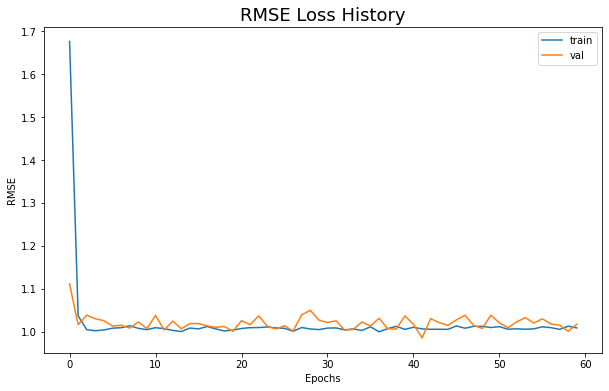

model train time: 28.946

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 0.1
EPOCH 1: Avg losses: train: 2.712, val: 1.779
EPOCH 2: Avg losses: train: 1.540, val: 1.493
EPOCH 3: Avg losses: train: 1.428, val: 1.513
EPOCH 4: Avg losses: train: 1.446, val: 1.551
EPOCH 5: Avg losses: train: 1.462, val: 1.518
EPOCH 6: Avg losses: train: 1.450, val: 1.509
EPOCH 7: Avg losses: train: 1.462, val: 1.496
EPOCH 8: Avg losses: train: 1.471, val: 1.466
EPOCH 9: Avg losses: train: 1.465, val: 1.503
EPOCH 10: Avg losses: train: 1.460, val: 1.499
EPOCH 11: Avg losses: train: 1.462, val: 1.537
EPOCH 12: Avg losses: train: 1.461, val: 1.492
EPOCH 13: Avg losses: train: 1.459, val: 1.500
EPOCH 14: Avg losses: train: 1.466, val: 1.484
EPOCH 15: Avg losses: train: 1.455, val: 1.483
EPOCH 16: Avg losses: train: 1.472, val: 1.502
EPOCH 17: Avg losses: train: 1.458, val: 1.509
EPOCH 18: Avg losses: train: 1.462, val: 1.514
EPOCH 19: Avg losses: train: 1.470, val: 1.520
EPOCH 20: Avg losses: tra

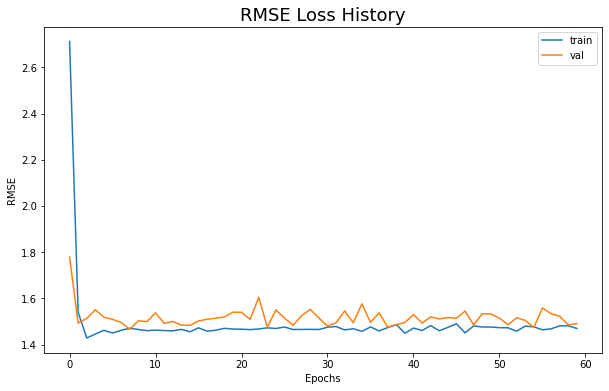

model train time: 29.290

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 1
EPOCH 1: Avg losses: train: 3.620, val: 3.488
EPOCH 2: Avg losses: train: 3.470, val: 3.459
EPOCH 3: Avg losses: train: 3.412, val: 3.381
EPOCH 4: Avg losses: train: 3.408, val: 3.387
EPOCH 5: Avg losses: train: 3.413, val: 3.442
EPOCH 6: Avg losses: train: 3.407, val: 3.389
EPOCH 7: Avg losses: train: 3.409, val: 3.442
EPOCH 8: Avg losses: train: 3.404, val: 3.437
EPOCH 9: Avg losses: train: 3.406, val: 3.446
EPOCH 10: Avg losses: train: 3.402, val: 3.415
EPOCH 11: Avg losses: train: 3.399, val: 3.368
EPOCH 12: Avg losses: train: 3.407, val: 3.431
EPOCH 13: Avg losses: train: 3.403, val: 3.438
EPOCH 14: Avg losses: train: 3.409, val: 3.406
EPOCH 15: Avg losses: train: 3.405, val: 3.485
EPOCH 16: Avg losses: train: 3.396, val: 3.448
EPOCH 17: Avg losses: train: 3.408, val: 3.428
EPOCH 18: Avg losses: train: 3.408, val: 3.422
EPOCH 19: Avg losses: train: 3.410, val: 3.470
EPOCH 20: Avg losses: train

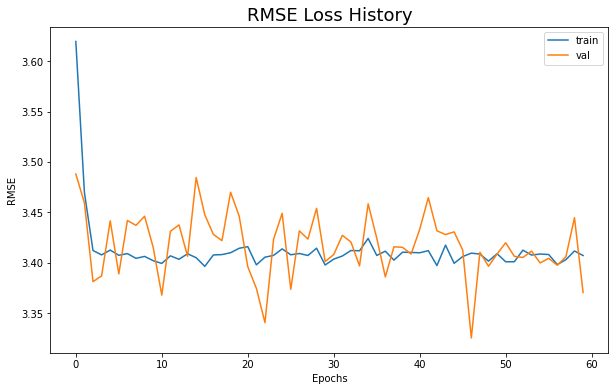

model train time: 29.257

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 100
EPOCH 1: Avg losses: train: 3.706, val: 3.654
EPOCH 2: Avg losses: train: 3.697, val: 3.720
EPOCH 3: Avg losses: train: 3.695, val: 3.658
EPOCH 4: Avg losses: train: 3.697, val: 3.663
EPOCH 5: Avg losses: train: 3.699, val: 3.718
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.693, val: 3.727
EPOCH 8: Avg losses: train: 3.689, val: 3.707
EPOCH 9: Avg losses: train: 3.690, val: 3.721
EPOCH 10: Avg losses: train: 3.685, val: 3.688
EPOCH 11: Avg losses: train: 3.683, val: 3.643
EPOCH 12: Avg losses: train: 3.690, val: 3.716
EPOCH 13: Avg losses: train: 3.686, val: 3.722
EPOCH 14: Avg losses: train: 3.695, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.769
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.688, val: 3.711
EPOCH 18: Avg losses: train: 3.690, val: 3.697
EPOCH 19: Avg losses: train: 3.692, val: 3.744
EPOCH 20: Avg losses: tra

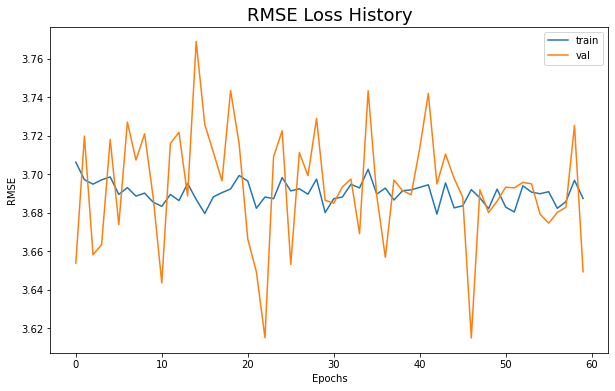

model train time: 29.496

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.001, reg: 1000
EPOCH 1: Avg losses: train: 3.707, val: 3.655
EPOCH 2: Avg losses: train: 3.699, val: 3.722
EPOCH 3: Avg losses: train: 3.697, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

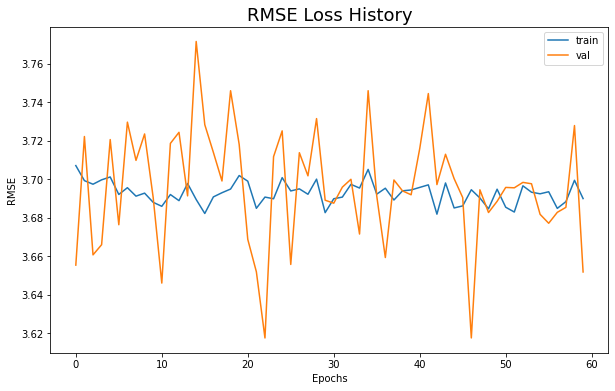

model train time: 29.398

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.387, val: 1.046
EPOCH 2: Avg losses: train: 1.013, val: 0.967
EPOCH 3: Avg losses: train: 0.948, val: 0.963
EPOCH 4: Avg losses: train: 0.932, val: 0.942
EPOCH 5: Avg losses: train: 0.912, val: 0.924
EPOCH 6: Avg losses: train: 0.903, val: 0.904
EPOCH 7: Avg losses: train: 0.887, val: 0.900
EPOCH 8: Avg losses: train: 0.879, val: 0.891
EPOCH 9: Avg losses: train: 0.869, val: 0.909
EPOCH 10: Avg losses: train: 0.861, val: 0.895
EPOCH 11: Avg losses: train: 0.859, val: 0.907
EPOCH 12: Avg losses: train: 0.849, val: 0.896
EPOCH 13: Avg losses: train: 0.838, val: 0.876
EPOCH 14: Avg losses: train: 0.836, val: 0.871
EPOCH 15: Avg losses: train: 0.832, val: 0.891
EPOCH 16: Avg losses: train: 0.832, val: 0.878
EPOCH 17: Avg losses: train: 0.826, val: 0.876
EPOCH 18: Avg losses: train: 0.811, val: 0.861
EPOCH 19: Avg losses: train: 0.808, val: 0.844
EPOCH 20: Avg losses: t

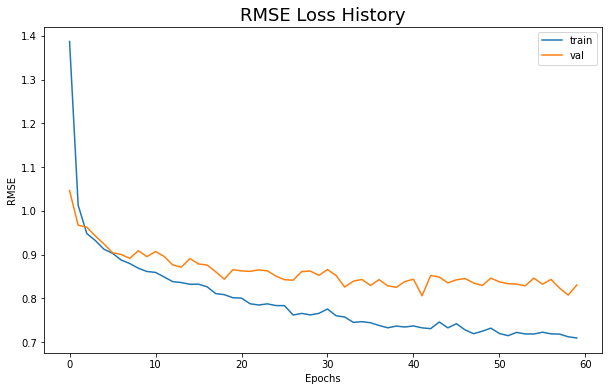

model train time: 29.307

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 0.01
EPOCH 1: Avg losses: train: 1.399, val: 1.084
EPOCH 2: Avg losses: train: 1.083, val: 1.079
EPOCH 3: Avg losses: train: 1.066, val: 1.096
EPOCH 4: Avg losses: train: 1.069, val: 1.101
EPOCH 5: Avg losses: train: 1.078, val: 1.095
EPOCH 6: Avg losses: train: 1.079, val: 1.073
EPOCH 7: Avg losses: train: 1.080, val: 1.073
EPOCH 8: Avg losses: train: 1.077, val: 1.091
EPOCH 9: Avg losses: train: 1.072, val: 1.076
EPOCH 10: Avg losses: train: 1.070, val: 1.062
EPOCH 11: Avg losses: train: 1.070, val: 1.110
EPOCH 12: Avg losses: train: 1.084, val: 1.071
EPOCH 13: Avg losses: train: 1.065, val: 1.076
EPOCH 14: Avg losses: train: 1.075, val: 1.059
EPOCH 15: Avg losses: train: 1.071, val: 1.086
EPOCH 16: Avg losses: train: 1.077, val: 1.132
EPOCH 17: Avg losses: train: 1.100, val: 1.102
EPOCH 18: Avg losses: train: 1.071, val: 1.097
EPOCH 19: Avg losses: train: 1.074, val: 1.072
EPOCH 20: Avg losses: tr

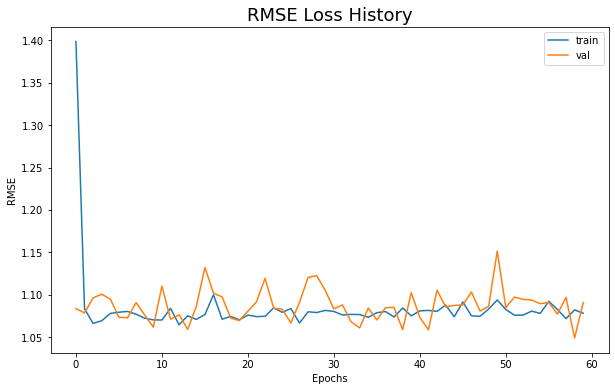

model train time: 29.542

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 0.1
EPOCH 1: Avg losses: train: 1.914, val: 1.515
EPOCH 2: Avg losses: train: 1.522, val: 1.541
EPOCH 3: Avg losses: train: 1.506, val: 1.546
EPOCH 4: Avg losses: train: 1.545, val: 1.630
EPOCH 5: Avg losses: train: 1.550, val: 1.580
EPOCH 6: Avg losses: train: 1.548, val: 1.636
EPOCH 7: Avg losses: train: 1.552, val: 1.631
EPOCH 8: Avg losses: train: 1.550, val: 1.570
EPOCH 9: Avg losses: train: 1.547, val: 1.557
EPOCH 10: Avg losses: train: 1.551, val: 1.605
EPOCH 11: Avg losses: train: 1.540, val: 1.613
EPOCH 12: Avg losses: train: 1.560, val: 1.627
EPOCH 13: Avg losses: train: 1.544, val: 1.655
EPOCH 14: Avg losses: train: 1.558, val: 1.527
EPOCH 15: Avg losses: train: 1.545, val: 1.687
EPOCH 16: Avg losses: train: 1.566, val: 1.592
EPOCH 17: Avg losses: train: 1.558, val: 1.637
EPOCH 18: Avg losses: train: 1.554, val: 1.628
EPOCH 19: Avg losses: train: 1.572, val: 1.630
EPOCH 20: Avg losses: tra

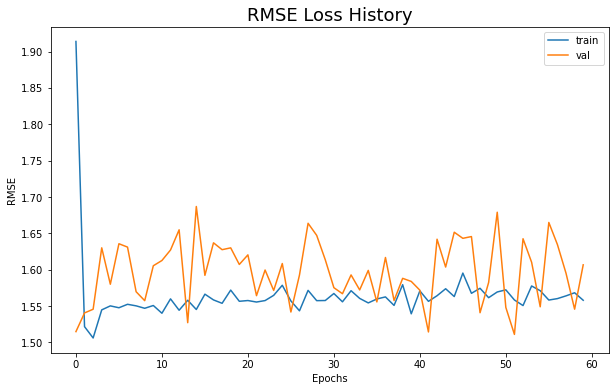

model train time: 29.165

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 1
EPOCH 1: Avg losses: train: 3.479, val: 3.318
EPOCH 2: Avg losses: train: 3.398, val: 3.472
EPOCH 3: Avg losses: train: 3.414, val: 3.383
EPOCH 4: Avg losses: train: 3.413, val: 3.382
EPOCH 5: Avg losses: train: 3.414, val: 3.443
EPOCH 6: Avg losses: train: 3.406, val: 3.386
EPOCH 7: Avg losses: train: 3.410, val: 3.448
EPOCH 8: Avg losses: train: 3.407, val: 3.440
EPOCH 9: Avg losses: train: 3.407, val: 3.450
EPOCH 10: Avg losses: train: 3.403, val: 3.415
EPOCH 11: Avg losses: train: 3.399, val: 3.367
EPOCH 12: Avg losses: train: 3.406, val: 3.445
EPOCH 13: Avg losses: train: 3.405, val: 3.437
EPOCH 14: Avg losses: train: 3.413, val: 3.398
EPOCH 15: Avg losses: train: 3.404, val: 3.487
EPOCH 16: Avg losses: train: 3.399, val: 3.455
EPOCH 17: Avg losses: train: 3.409, val: 3.437
EPOCH 18: Avg losses: train: 3.410, val: 3.418
EPOCH 19: Avg losses: train: 3.410, val: 3.474
EPOCH 20: Avg losses: train

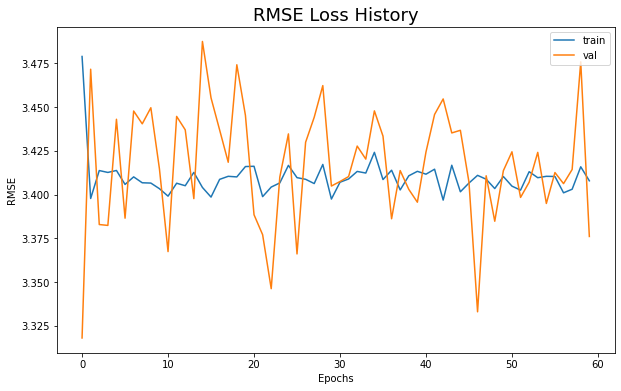

model train time: 29.944

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 100
EPOCH 1: Avg losses: train: 3.695, val: 3.650
EPOCH 2: Avg losses: train: 3.695, val: 3.720
EPOCH 3: Avg losses: train: 3.695, val: 3.658
EPOCH 4: Avg losses: train: 3.697, val: 3.663
EPOCH 5: Avg losses: train: 3.699, val: 3.718
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.693, val: 3.727
EPOCH 8: Avg losses: train: 3.689, val: 3.707
EPOCH 9: Avg losses: train: 3.690, val: 3.721
EPOCH 10: Avg losses: train: 3.685, val: 3.688
EPOCH 11: Avg losses: train: 3.683, val: 3.643
EPOCH 12: Avg losses: train: 3.689, val: 3.716
EPOCH 13: Avg losses: train: 3.686, val: 3.722
EPOCH 14: Avg losses: train: 3.695, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.769
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.688, val: 3.712
EPOCH 18: Avg losses: train: 3.690, val: 3.697
EPOCH 19: Avg losses: train: 3.692, val: 3.744
EPOCH 20: Avg losses: tra

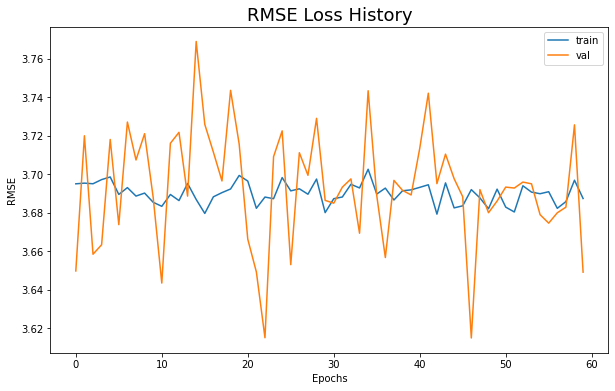

model train time: 29.636

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.003, reg: 1000
EPOCH 1: Avg losses: train: 3.697, val: 3.653
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

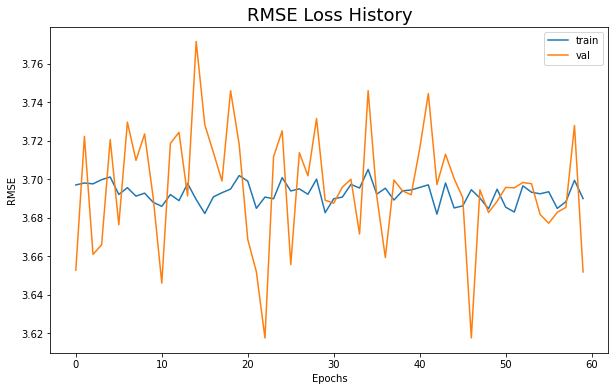

model train time: 29.680

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.389, val: 1.046
EPOCH 2: Avg losses: train: 1.029, val: 0.977
EPOCH 3: Avg losses: train: 0.977, val: 0.986
EPOCH 4: Avg losses: train: 0.963, val: 0.965
EPOCH 5: Avg losses: train: 0.946, val: 0.951
EPOCH 6: Avg losses: train: 0.939, val: 0.932
EPOCH 7: Avg losses: train: 0.926, val: 0.929
EPOCH 8: Avg losses: train: 0.923, val: 0.924
EPOCH 9: Avg losses: train: 0.918, val: 0.941
EPOCH 10: Avg losses: train: 0.911, val: 0.924
EPOCH 11: Avg losses: train: 0.911, val: 0.946
EPOCH 12: Avg losses: train: 0.908, val: 0.930
EPOCH 13: Avg losses: train: 0.902, val: 0.926
EPOCH 14: Avg losses: train: 0.904, val: 0.914
EPOCH 15: Avg losses: train: 0.904, val: 0.932
EPOCH 16: Avg losses: train: 0.908, val: 0.927
EPOCH 17: Avg losses: train: 0.910, val: 0.919
EPOCH 18: Avg losses: train: 0.889, val: 0.914
EPOCH 19: Avg losses: train: 0.889, val: 0.897
EPOCH 20: Avg losses: t

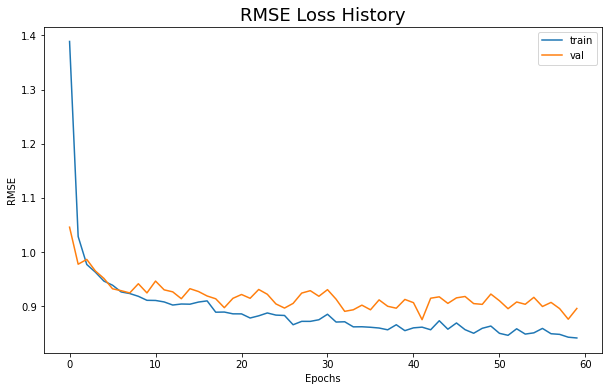

model train time: 30.230

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 0.01
EPOCH 1: Avg losses: train: 1.398, val: 1.158
EPOCH 2: Avg losses: train: 1.133, val: 1.104
EPOCH 3: Avg losses: train: 1.105, val: 1.129
EPOCH 4: Avg losses: train: 1.110, val: 1.142
EPOCH 5: Avg losses: train: 1.126, val: 1.147
EPOCH 6: Avg losses: train: 1.128, val: 1.117
EPOCH 7: Avg losses: train: 1.122, val: 1.104
EPOCH 8: Avg losses: train: 1.122, val: 1.121
EPOCH 9: Avg losses: train: 1.112, val: 1.127
EPOCH 10: Avg losses: train: 1.127, val: 1.112
EPOCH 11: Avg losses: train: 1.130, val: 1.168
EPOCH 12: Avg losses: train: 1.127, val: 1.089
EPOCH 13: Avg losses: train: 1.110, val: 1.109
EPOCH 14: Avg losses: train: 1.127, val: 1.117
EPOCH 15: Avg losses: train: 1.127, val: 1.152
EPOCH 16: Avg losses: train: 1.128, val: 1.182
EPOCH 17: Avg losses: train: 1.139, val: 1.128
EPOCH 18: Avg losses: train: 1.118, val: 1.130
EPOCH 19: Avg losses: train: 1.125, val: 1.117
EPOCH 20: Avg losses: tr

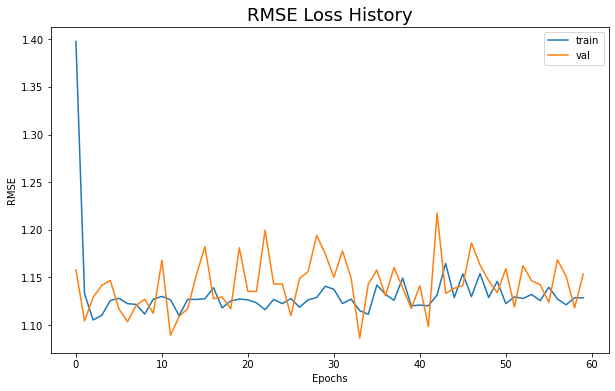

model train time: 28.820

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 0.1
EPOCH 1: Avg losses: train: 1.772, val: 1.655
EPOCH 2: Avg losses: train: 1.608, val: 1.579
EPOCH 3: Avg losses: train: 1.574, val: 1.695
EPOCH 4: Avg losses: train: 1.628, val: 1.667
EPOCH 5: Avg losses: train: 1.621, val: 1.659
EPOCH 6: Avg losses: train: 1.641, val: 1.679
EPOCH 7: Avg losses: train: 1.630, val: 1.768
EPOCH 8: Avg losses: train: 1.630, val: 1.596
EPOCH 9: Avg losses: train: 1.612, val: 1.652
EPOCH 10: Avg losses: train: 1.633, val: 1.671
EPOCH 11: Avg losses: train: 1.614, val: 1.692
EPOCH 12: Avg losses: train: 1.634, val: 1.668
EPOCH 13: Avg losses: train: 1.621, val: 1.681
EPOCH 14: Avg losses: train: 1.631, val: 1.599
EPOCH 15: Avg losses: train: 1.635, val: 1.787
EPOCH 16: Avg losses: train: 1.648, val: 1.663
EPOCH 17: Avg losses: train: 1.653, val: 1.684
EPOCH 18: Avg losses: train: 1.625, val: 1.720
EPOCH 19: Avg losses: train: 1.637, val: 1.733
EPOCH 20: Avg losses: tra

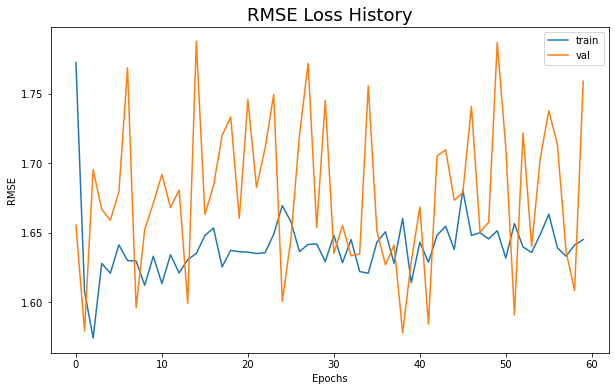

model train time: 29.329

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 1
EPOCH 1: Avg losses: train: 3.424, val: 3.374
EPOCH 2: Avg losses: train: 3.421, val: 3.452
EPOCH 3: Avg losses: train: 3.414, val: 3.379
EPOCH 4: Avg losses: train: 3.411, val: 3.381
EPOCH 5: Avg losses: train: 3.414, val: 3.444
EPOCH 6: Avg losses: train: 3.405, val: 3.389
EPOCH 7: Avg losses: train: 3.410, val: 3.466
EPOCH 8: Avg losses: train: 3.409, val: 3.447
EPOCH 9: Avg losses: train: 3.406, val: 3.449
EPOCH 10: Avg losses: train: 3.404, val: 3.419
EPOCH 11: Avg losses: train: 3.400, val: 3.368
EPOCH 12: Avg losses: train: 3.408, val: 3.451
EPOCH 13: Avg losses: train: 3.405, val: 3.446
EPOCH 14: Avg losses: train: 3.414, val: 3.397
EPOCH 15: Avg losses: train: 3.404, val: 3.493
EPOCH 16: Avg losses: train: 3.400, val: 3.458
EPOCH 17: Avg losses: train: 3.410, val: 3.438
EPOCH 18: Avg losses: train: 3.410, val: 3.416
EPOCH 19: Avg losses: train: 3.412, val: 3.461
EPOCH 20: Avg losses: train

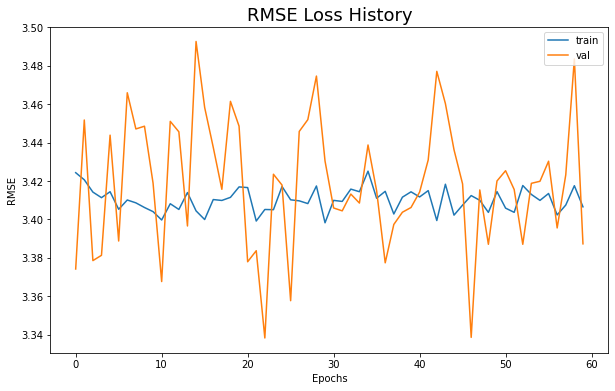

model train time: 28.578

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 100
EPOCH 1: Avg losses: train: 3.692, val: 3.651
EPOCH 2: Avg losses: train: 3.696, val: 3.720
EPOCH 3: Avg losses: train: 3.695, val: 3.658
EPOCH 4: Avg losses: train: 3.697, val: 3.663
EPOCH 5: Avg losses: train: 3.699, val: 3.718
EPOCH 6: Avg losses: train: 3.690, val: 3.674
EPOCH 7: Avg losses: train: 3.693, val: 3.727
EPOCH 8: Avg losses: train: 3.689, val: 3.707
EPOCH 9: Avg losses: train: 3.690, val: 3.721
EPOCH 10: Avg losses: train: 3.685, val: 3.688
EPOCH 11: Avg losses: train: 3.683, val: 3.643
EPOCH 12: Avg losses: train: 3.689, val: 3.716
EPOCH 13: Avg losses: train: 3.686, val: 3.722
EPOCH 14: Avg losses: train: 3.695, val: 3.689
EPOCH 15: Avg losses: train: 3.687, val: 3.769
EPOCH 16: Avg losses: train: 3.680, val: 3.726
EPOCH 17: Avg losses: train: 3.688, val: 3.712
EPOCH 18: Avg losses: train: 3.690, val: 3.696
EPOCH 19: Avg losses: train: 3.692, val: 3.744
EPOCH 20: Avg losses: tra

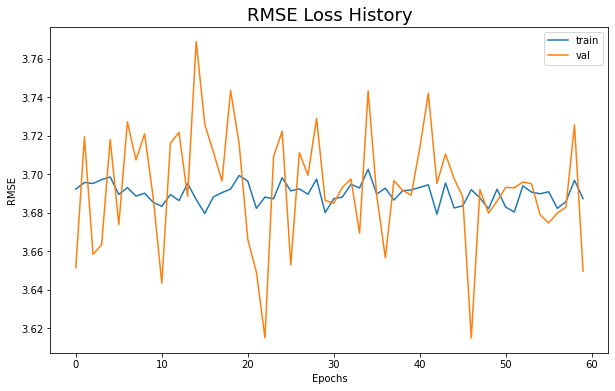

model train time: 30.572

STARTING TRAIN AutoRec with num_hidden: 600, lr: 0.005, reg: 1000
EPOCH 1: Avg losses: train: 3.695, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.676
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.690
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.724
EPOCH 14: Avg losses: train: 3.698, val: 3.691
EPOCH 15: Avg losses: train: 3.689, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.728
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: tr

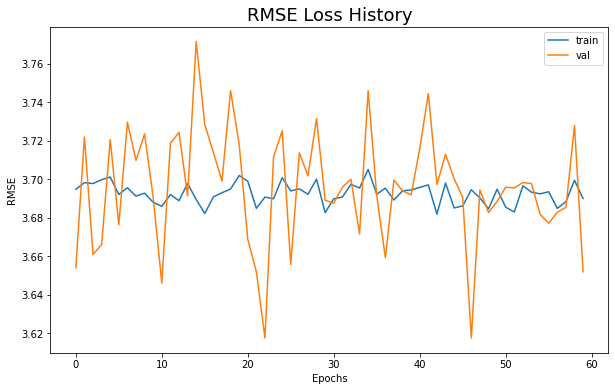

model train time: 29.243



In [10]:
autorec_results = autorec_hyper_params(find=True)

In [16]:
autorec_results = autorec_hyper_params(find=False)
autorec_results.sort_values(by='val_loss')

model_name  train_loss  val_loss  \
98    AutoRec_600_0.001_0.001    0.564620  0.769343   
74    AutoRec_500_0.001_0.001    0.579099  0.773651   
82    AutoRec_500_0.003_0.001    0.702055  0.823301   
50    AutoRec_200_0.001_0.001    0.728508  0.824555   
106   AutoRec_600_0.003_0.001    0.709169  0.830301   
..                        ...         ...       ...   
25   AutoRecV2_500_0.005_1000    3.698192  3.722198   
8     AutoRecV2_500_0.001_100    3.698175  3.722205   
16    AutoRecV2_500_0.003_100    3.698107  3.722220   
17   AutoRecV2_500_0.003_1000    3.698133  3.722236   
9    AutoRecV2_500_0.001_1000    3.698255  3.722244   

                                                params  
98   {'model_params': {'num_hidden': 600}, 'seed': ...  
74   {'model_params': {'num_hidden': 500}, 'seed': ...  
82   {'model_params': {'num_hidden': 500}, 'seed': ...  
50   {'model_params': {'num_hidden': 200}, 'seed': ...  
106  {'model_params': {'num_hidden': 600}, 'seed': ...  
..                                                 ...  
25   {'model_params': {'num_hidden': 500}, 'seed': ...  
8    {'model_params': {'num_hidden': 500}, 'seed': ...  
16   {'model_params': {'num_hidden': 500}, 'seed': ...  
17   {'model_params': {'num_hidden': 500}, 'seed': ...  
9    {'model_params': {'num_hidden': 500}, 'seed': ...  

[122 rows x 4 columns]

# AutoRecV2

In [17]:
from src.autorecv2.model import AutoRecV2
from src.autorecv2.training import AutoRecV2Trainer

In [26]:
# If you wish to find hyper params run `autorec_hyper_params` with `find=True`
# It will save the params and losses to models_params folder
# Otherwise it will return a df with the already run models

epochs = 60
batch_size = 64


def autorecv2_hyper_params(find=False):
    if find:
        for num_hidden in [500]:
            for lr in [0.001, 0.003, 0.005]:
                for reg in [0.001, 0.01, 0.1, 1, 100, 1000]:
                    print(f'STARTING TRAIN AutoRecV2 with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}')
                    start_time = time()
                    model_dict = {}

                    num_users, num_items = train.shape

                    # Init model and trainer
                    model = AutoRecV2(num_hidden=num_hidden, num_features=num_users)
                    autorec_trainer = AutoRecV2Trainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

                    # Train
                    autorec_trainer.train_model()

                    # Save parmas to model_dict
                    model_dict['model_params'] = model.params()
                    model_dict.update(autorec_trainer.params())
                    model_dict['train_losses'] = autorec_trainer.train_losses
                    model_dict['val_losses'] = autorec_trainer.val_losses

                    # Save model params to json file
                    file_name = f'models_params/AutoRecV2_{num_hidden}_{lr}_{reg}'
                    with open(file_name, 'w') as f:
                        json.dump(model_dict, f, indent=4)

                    plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
                    print(f'model train time: {time() - start_time:.3f}\n')
        return
    else:
        return models_results('AutoRecV2')


STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.640, val: 1.102
EPOCH 2: Avg losses: train: 1.033, val: 0.982
EPOCH 3: Avg losses: train: 0.974, val: 0.976
EPOCH 4: Avg losses: train: 0.957, val: 0.956
EPOCH 5: Avg losses: train: 0.941, val: 0.941
EPOCH 6: Avg losses: train: 0.931, val: 0.919
EPOCH 7: Avg losses: train: 0.918, val: 0.913
EPOCH 8: Avg losses: train: 0.917, val: 0.910
EPOCH 9: Avg losses: train: 0.908, val: 0.918
EPOCH 10: Avg losses: train: 0.901, val: 0.903
EPOCH 11: Avg losses: train: 0.899, val: 0.922
EPOCH 12: Avg losses: train: 0.890, val: 0.891
EPOCH 13: Avg losses: train: 0.889, val: 0.905
EPOCH 14: Avg losses: train: 0.883, val: 0.902
EPOCH 15: Avg losses: train: 0.884, val: 0.909
EPOCH 16: Avg losses: train: 0.880, val: 0.890
EPOCH 17: Avg losses: train: 0.871, val: 0.884
EPOCH 18: Avg losses: train: 0.863, val: 0.879
EPOCH 19: Avg losses: train: 0.864, val: 0.873
EPOCH 20: Avg losses: train: 0.863, val: 0.893


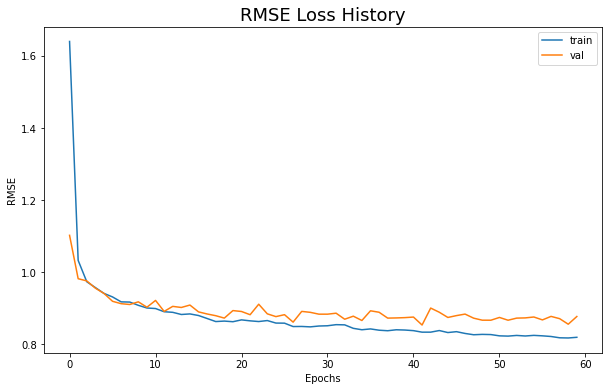

model train time: 30.135

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 0.01
EPOCH 1: Avg losses: train: 1.745, val: 1.098
EPOCH 2: Avg losses: train: 1.034, val: 1.005
EPOCH 3: Avg losses: train: 1.002, val: 1.038
EPOCH 4: Avg losses: train: 1.008, val: 1.021
EPOCH 5: Avg losses: train: 1.004, val: 0.994
EPOCH 6: Avg losses: train: 0.998, val: 0.989
EPOCH 7: Avg losses: train: 0.995, val: 1.001
EPOCH 8: Avg losses: train: 1.004, val: 0.995
EPOCH 9: Avg losses: train: 0.998, val: 1.000
EPOCH 10: Avg losses: train: 0.992, val: 0.987
EPOCH 11: Avg losses: train: 0.998, val: 1.009
EPOCH 12: Avg losses: train: 0.995, val: 0.979
EPOCH 13: Avg losses: train: 0.987, val: 0.993
EPOCH 14: Avg losses: train: 0.984, val: 0.981
EPOCH 15: Avg losses: train: 0.990, val: 0.996
EPOCH 16: Avg losses: train: 0.991, val: 1.012
EPOCH 17: Avg losses: train: 0.992, val: 0.998
EPOCH 18: Avg losses: train: 0.989, val: 0.979
EPOCH 19: Avg losses: train: 0.986, val: 0.980
EPOCH 20: Avg losses: 

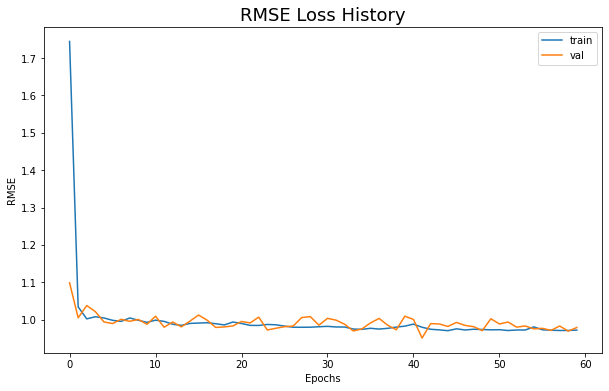

model train time: 30.217

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 0.1
EPOCH 1: Avg losses: train: 3.125, val: 1.669
EPOCH 2: Avg losses: train: 1.256, val: 1.124
EPOCH 3: Avg losses: train: 1.131, val: 1.154
EPOCH 4: Avg losses: train: 1.135, val: 1.159
EPOCH 5: Avg losses: train: 1.130, val: 1.144
EPOCH 6: Avg losses: train: 1.130, val: 1.159
EPOCH 7: Avg losses: train: 1.138, val: 1.160
EPOCH 8: Avg losses: train: 1.133, val: 1.174
EPOCH 9: Avg losses: train: 1.130, val: 1.136
EPOCH 10: Avg losses: train: 1.123, val: 1.145
EPOCH 11: Avg losses: train: 1.125, val: 1.177
EPOCH 12: Avg losses: train: 1.121, val: 1.188
EPOCH 13: Avg losses: train: 1.113, val: 1.174
EPOCH 14: Avg losses: train: 1.116, val: 1.108
EPOCH 15: Avg losses: train: 1.119, val: 1.146
EPOCH 16: Avg losses: train: 1.117, val: 1.115
EPOCH 17: Avg losses: train: 1.115, val: 1.137
EPOCH 18: Avg losses: train: 1.115, val: 1.132
EPOCH 19: Avg losses: train: 1.113, val: 1.171
EPOCH 20: Avg losses: t

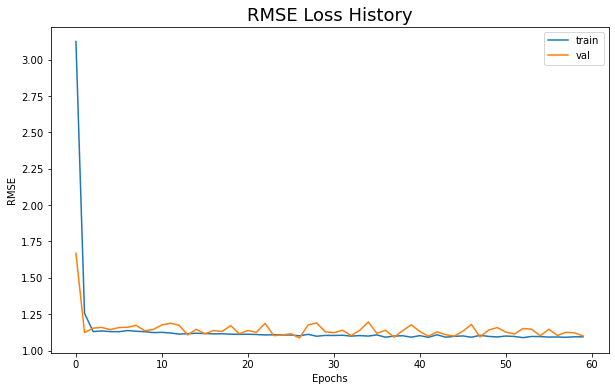

model train time: 29.868

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 1
EPOCH 1: Avg losses: train: 3.678, val: 3.640
EPOCH 2: Avg losses: train: 3.688, val: 3.717
EPOCH 3: Avg losses: train: 3.695, val: 3.659
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.700, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.675
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.690, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.689
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.723
EPOCH 14: Avg losses: train: 3.696, val: 3.690
EPOCH 15: Avg losses: train: 3.688, val: 3.770
EPOCH 16: Avg losses: train: 3.681, val: 3.727
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.698
EPOCH 19: Avg losses: train: 3.693, val: 3.744
EPOCH 20: Avg losses: tra

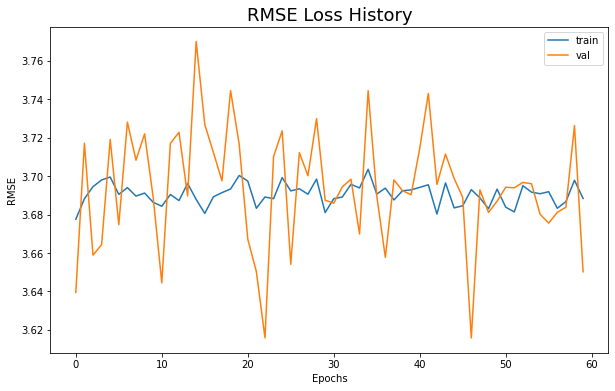

model train time: 31.217

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 100
EPOCH 1: Avg losses: train: 3.691, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: t

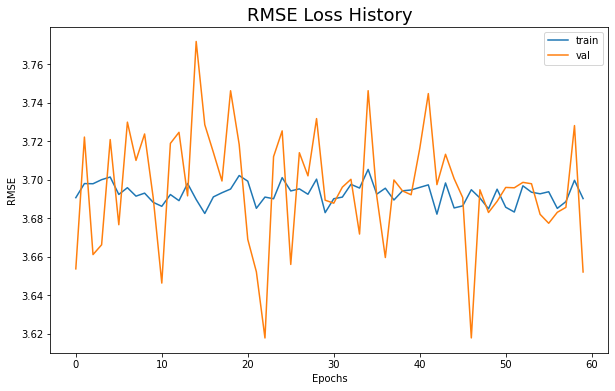

model train time: 30.833

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.001, reg: 1000
EPOCH 1: Avg losses: train: 3.691, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: 

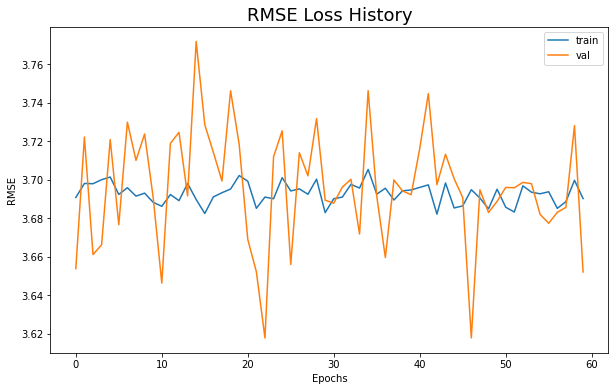

model train time: 31.328

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.457, val: 1.077
EPOCH 2: Avg losses: train: 1.030, val: 0.981
EPOCH 3: Avg losses: train: 0.987, val: 0.982
EPOCH 4: Avg losses: train: 0.979, val: 0.961
EPOCH 5: Avg losses: train: 0.963, val: 0.954
EPOCH 6: Avg losses: train: 0.952, val: 0.950
EPOCH 7: Avg losses: train: 0.947, val: 0.933
EPOCH 8: Avg losses: train: 0.946, val: 0.928
EPOCH 9: Avg losses: train: 0.942, val: 0.942
EPOCH 10: Avg losses: train: 0.935, val: 0.961
EPOCH 11: Avg losses: train: 0.937, val: 0.946
EPOCH 12: Avg losses: train: 0.926, val: 0.925
EPOCH 13: Avg losses: train: 0.915, val: 0.921
EPOCH 14: Avg losses: train: 0.915, val: 0.924
EPOCH 15: Avg losses: train: 0.920, val: 0.933
EPOCH 16: Avg losses: train: 0.923, val: 0.917
EPOCH 17: Avg losses: train: 0.920, val: 0.909
EPOCH 18: Avg losses: train: 0.914, val: 0.931
EPOCH 19: Avg losses: train: 0.906, val: 0.905
EPOCH 20: Avg losses:

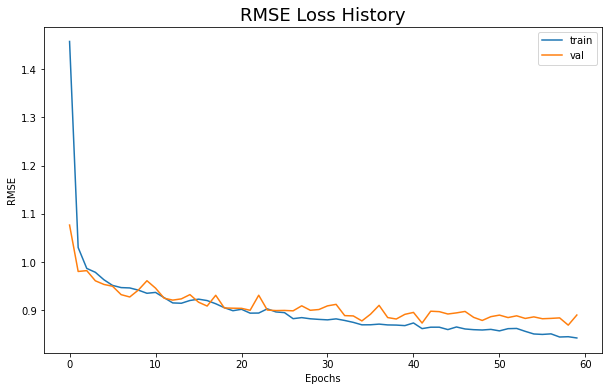

model train time: 31.472

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 0.01
EPOCH 1: Avg losses: train: 1.402, val: 1.127
EPOCH 2: Avg losses: train: 1.077, val: 1.038
EPOCH 3: Avg losses: train: 1.048, val: 1.058
EPOCH 4: Avg losses: train: 1.042, val: 1.089
EPOCH 5: Avg losses: train: 1.054, val: 1.053
EPOCH 6: Avg losses: train: 1.048, val: 1.018
EPOCH 7: Avg losses: train: 1.038, val: 1.009
EPOCH 8: Avg losses: train: 1.027, val: 1.017
EPOCH 9: Avg losses: train: 1.015, val: 1.041
EPOCH 10: Avg losses: train: 1.018, val: 0.997
EPOCH 11: Avg losses: train: 1.012, val: 1.034
EPOCH 12: Avg losses: train: 1.011, val: 0.993
EPOCH 13: Avg losses: train: 1.003, val: 1.020
EPOCH 14: Avg losses: train: 1.004, val: 0.998
EPOCH 15: Avg losses: train: 1.029, val: 1.023
EPOCH 16: Avg losses: train: 1.017, val: 1.021
EPOCH 17: Avg losses: train: 1.016, val: 0.993
EPOCH 18: Avg losses: train: 1.002, val: 0.994
EPOCH 19: Avg losses: train: 0.994, val: 0.992
EPOCH 20: Avg losses: 

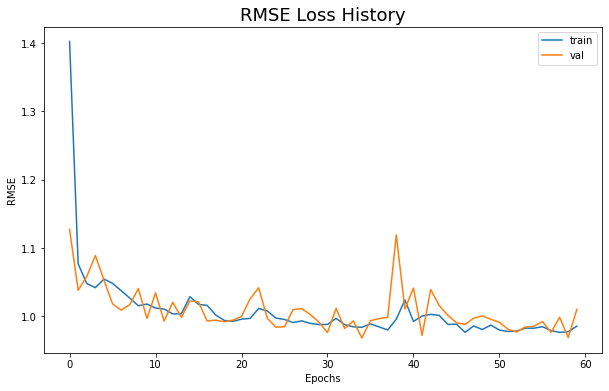

model train time: 31.579

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 0.1
EPOCH 1: Avg losses: train: 2.050, val: 1.226
EPOCH 2: Avg losses: train: 1.230, val: 1.214
EPOCH 3: Avg losses: train: 1.190, val: 1.208
EPOCH 4: Avg losses: train: 1.196, val: 1.183
EPOCH 5: Avg losses: train: 1.174, val: 1.165
EPOCH 6: Avg losses: train: 1.160, val: 1.214
EPOCH 7: Avg losses: train: 1.153, val: 1.175
EPOCH 8: Avg losses: train: 1.146, val: 1.194
EPOCH 9: Avg losses: train: 1.143, val: 1.125
EPOCH 10: Avg losses: train: 1.136, val: 1.119
EPOCH 11: Avg losses: train: 1.132, val: 1.193
EPOCH 12: Avg losses: train: 1.126, val: 1.167
EPOCH 13: Avg losses: train: 1.120, val: 1.136
EPOCH 14: Avg losses: train: 1.120, val: 1.118
EPOCH 15: Avg losses: train: 1.126, val: 1.140
EPOCH 16: Avg losses: train: 1.121, val: 1.156
EPOCH 17: Avg losses: train: 1.124, val: 1.172
EPOCH 18: Avg losses: train: 1.117, val: 1.145
EPOCH 19: Avg losses: train: 1.117, val: 1.158
EPOCH 20: Avg losses: t

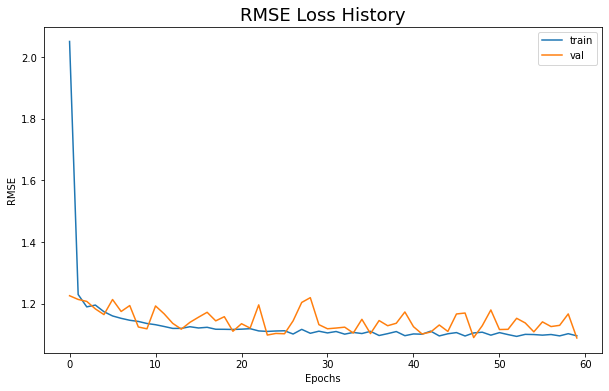

model train time: 31.908

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 1
EPOCH 1: Avg losses: train: 3.682, val: 3.651
EPOCH 2: Avg losses: train: 3.695, val: 3.720
EPOCH 3: Avg losses: train: 3.696, val: 3.659
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.700, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.675
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.690, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.689
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.723
EPOCH 14: Avg losses: train: 3.696, val: 3.690
EPOCH 15: Avg losses: train: 3.688, val: 3.770
EPOCH 16: Avg losses: train: 3.681, val: 3.727
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.698
EPOCH 19: Avg losses: train: 3.693, val: 3.744
EPOCH 20: Avg losses: tra

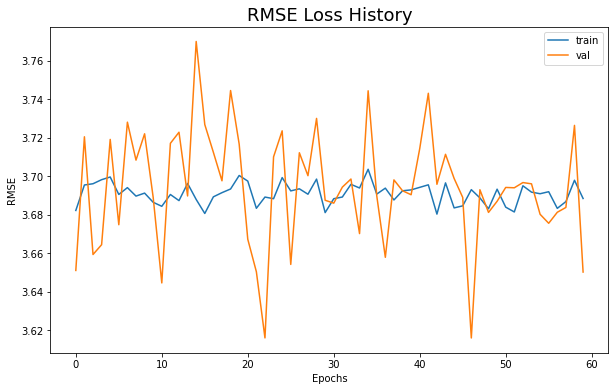

model train time: 32.817

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 100
EPOCH 1: Avg losses: train: 3.691, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: t

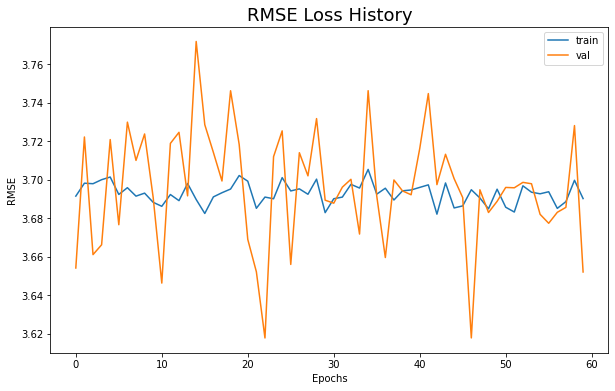

model train time: 32.989

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.003, reg: 1000
EPOCH 1: Avg losses: train: 3.692, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: 

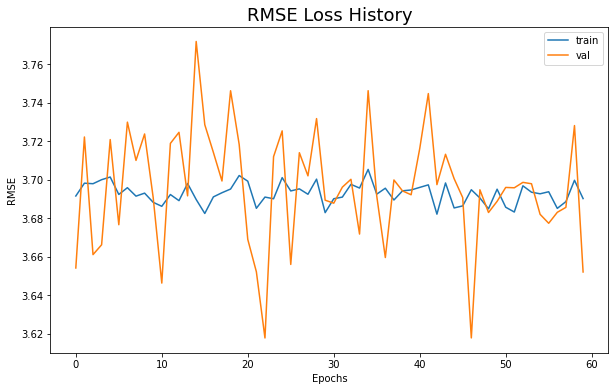

model train time: 32.646

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.393, val: 1.058
EPOCH 2: Avg losses: train: 1.031, val: 0.995
EPOCH 3: Avg losses: train: 0.992, val: 0.990
EPOCH 4: Avg losses: train: 0.993, val: 1.037
EPOCH 5: Avg losses: train: 1.018, val: 1.005
EPOCH 6: Avg losses: train: 0.981, val: 0.960
EPOCH 7: Avg losses: train: 0.971, val: 0.954
EPOCH 8: Avg losses: train: 0.971, val: 1.001
EPOCH 9: Avg losses: train: 0.971, val: 0.972
EPOCH 10: Avg losses: train: 0.961, val: 0.953
EPOCH 11: Avg losses: train: 0.975, val: 1.035
EPOCH 12: Avg losses: train: 0.977, val: 0.948
EPOCH 13: Avg losses: train: 0.960, val: 0.972
EPOCH 14: Avg losses: train: 0.958, val: 0.988
EPOCH 15: Avg losses: train: 0.966, val: 0.964
EPOCH 16: Avg losses: train: 0.963, val: 0.953
EPOCH 17: Avg losses: train: 0.956, val: 0.935
EPOCH 18: Avg losses: train: 0.944, val: 0.943
EPOCH 19: Avg losses: train: 0.949, val: 0.966
EPOCH 20: Avg losses:

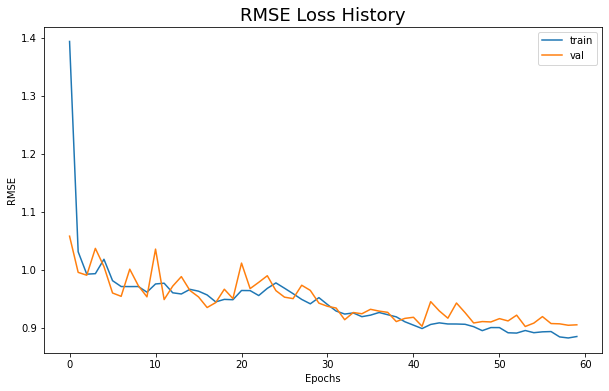

model train time: 31.593

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 0.01
EPOCH 1: Avg losses: train: 1.398, val: 1.113
EPOCH 2: Avg losses: train: 1.102, val: 1.069
EPOCH 3: Avg losses: train: 1.069, val: 1.079
EPOCH 4: Avg losses: train: 1.064, val: 1.071
EPOCH 5: Avg losses: train: 1.057, val: 1.075
EPOCH 6: Avg losses: train: 1.070, val: 1.036
EPOCH 7: Avg losses: train: 1.047, val: 1.049
EPOCH 8: Avg losses: train: 1.035, val: 1.018
EPOCH 9: Avg losses: train: 1.025, val: 1.054
EPOCH 10: Avg losses: train: 1.024, val: 1.015
EPOCH 11: Avg losses: train: 1.044, val: 1.034
EPOCH 12: Avg losses: train: 1.017, val: 1.024
EPOCH 13: Avg losses: train: 1.008, val: 1.029
EPOCH 14: Avg losses: train: 1.099, val: 1.093
EPOCH 15: Avg losses: train: 1.049, val: 1.044
EPOCH 16: Avg losses: train: 1.044, val: 1.026
EPOCH 17: Avg losses: train: 1.022, val: 0.989
EPOCH 18: Avg losses: train: 1.079, val: 1.075
EPOCH 19: Avg losses: train: 1.051, val: 1.006
EPOCH 20: Avg losses: 

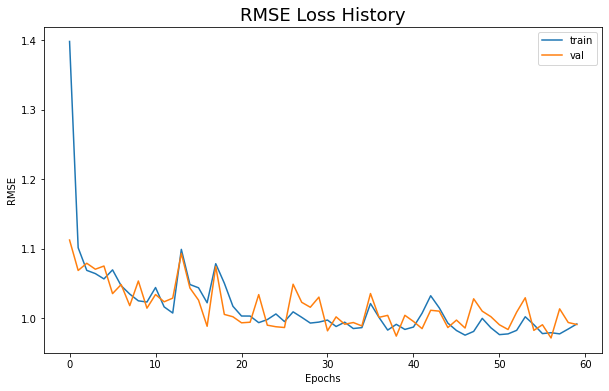

model train time: 31.653

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 0.1
EPOCH 1: Avg losses: train: 1.837, val: 1.350
EPOCH 2: Avg losses: train: 1.257, val: 1.218
EPOCH 3: Avg losses: train: 1.198, val: 1.251
EPOCH 4: Avg losses: train: 1.185, val: 1.199
EPOCH 5: Avg losses: train: 1.176, val: 1.230
EPOCH 6: Avg losses: train: 1.166, val: 1.174
EPOCH 7: Avg losses: train: 1.160, val: 1.170
EPOCH 8: Avg losses: train: 1.154, val: 1.191
EPOCH 9: Avg losses: train: 1.152, val: 1.144
EPOCH 10: Avg losses: train: 1.155, val: 1.144
EPOCH 11: Avg losses: train: 1.143, val: 1.179
EPOCH 12: Avg losses: train: 1.134, val: 1.160
EPOCH 13: Avg losses: train: 1.124, val: 1.153
EPOCH 14: Avg losses: train: 1.126, val: 1.117
EPOCH 15: Avg losses: train: 1.135, val: 1.147
EPOCH 16: Avg losses: train: 1.131, val: 1.164
EPOCH 17: Avg losses: train: 1.129, val: 1.153
EPOCH 18: Avg losses: train: 1.123, val: 1.183
EPOCH 19: Avg losses: train: 1.125, val: 1.162
EPOCH 20: Avg losses: t

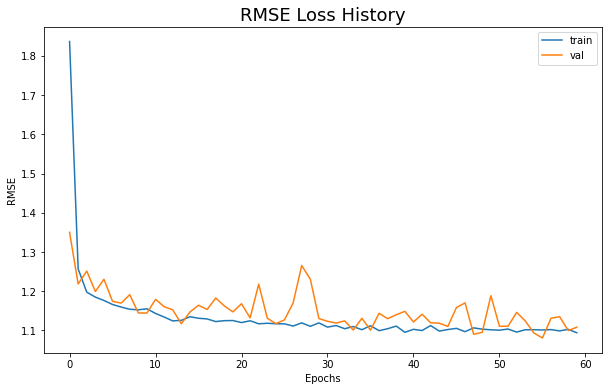

model train time: 31.625

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 1
EPOCH 1: Avg losses: train: 3.684, val: 3.649
EPOCH 2: Avg losses: train: 3.695, val: 3.720
EPOCH 3: Avg losses: train: 3.696, val: 3.659
EPOCH 4: Avg losses: train: 3.698, val: 3.664
EPOCH 5: Avg losses: train: 3.700, val: 3.719
EPOCH 6: Avg losses: train: 3.690, val: 3.675
EPOCH 7: Avg losses: train: 3.694, val: 3.728
EPOCH 8: Avg losses: train: 3.690, val: 3.708
EPOCH 9: Avg losses: train: 3.691, val: 3.722
EPOCH 10: Avg losses: train: 3.686, val: 3.689
EPOCH 11: Avg losses: train: 3.684, val: 3.644
EPOCH 12: Avg losses: train: 3.690, val: 3.717
EPOCH 13: Avg losses: train: 3.687, val: 3.723
EPOCH 14: Avg losses: train: 3.696, val: 3.690
EPOCH 15: Avg losses: train: 3.688, val: 3.770
EPOCH 16: Avg losses: train: 3.681, val: 3.727
EPOCH 17: Avg losses: train: 3.689, val: 3.712
EPOCH 18: Avg losses: train: 3.691, val: 3.698
EPOCH 19: Avg losses: train: 3.693, val: 3.745
EPOCH 20: Avg losses: tra

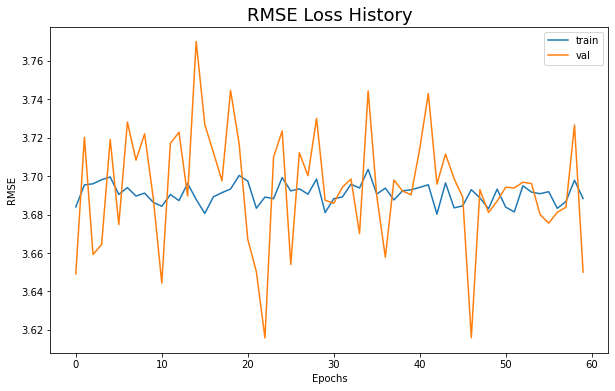

model train time: 32.724

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 100
EPOCH 1: Avg losses: train: 3.692, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: t

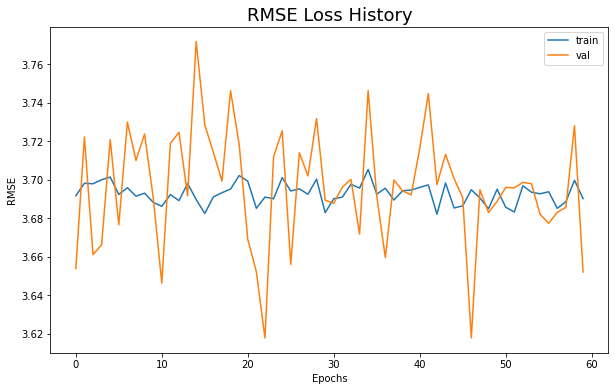

model train time: 33.035

STARTING TRAIN AutoRecV2 with num_hidden: 500, lr: 0.005, reg: 1000
EPOCH 1: Avg losses: train: 3.692, val: 3.654
EPOCH 2: Avg losses: train: 3.698, val: 3.722
EPOCH 3: Avg losses: train: 3.698, val: 3.661
EPOCH 4: Avg losses: train: 3.700, val: 3.666
EPOCH 5: Avg losses: train: 3.701, val: 3.721
EPOCH 6: Avg losses: train: 3.692, val: 3.677
EPOCH 7: Avg losses: train: 3.696, val: 3.730
EPOCH 8: Avg losses: train: 3.691, val: 3.710
EPOCH 9: Avg losses: train: 3.693, val: 3.724
EPOCH 10: Avg losses: train: 3.688, val: 3.691
EPOCH 11: Avg losses: train: 3.686, val: 3.646
EPOCH 12: Avg losses: train: 3.692, val: 3.719
EPOCH 13: Avg losses: train: 3.689, val: 3.725
EPOCH 14: Avg losses: train: 3.698, val: 3.692
EPOCH 15: Avg losses: train: 3.690, val: 3.772
EPOCH 16: Avg losses: train: 3.682, val: 3.729
EPOCH 17: Avg losses: train: 3.691, val: 3.714
EPOCH 18: Avg losses: train: 3.693, val: 3.699
EPOCH 19: Avg losses: train: 3.695, val: 3.746
EPOCH 20: Avg losses: 

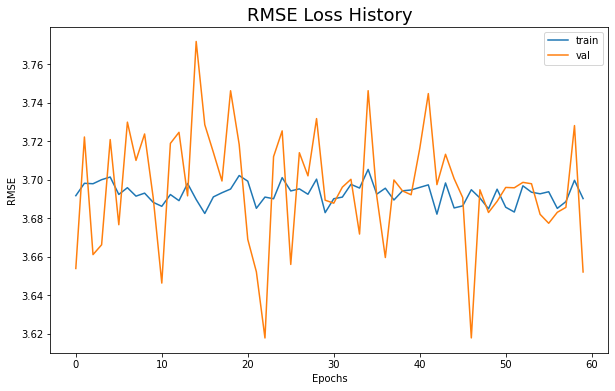

model train time: 32.770



In [27]:
autorecv2_results = autorecv2_hyper_params(find=True)

In [28]:
autorecv2_results = autorec_hyper_params(find=False)
autorecv2_results.sort_values(by='val_loss')

model_name  train_loss  val_loss  \
98    AutoRec_600_0.001_0.001    0.564620  0.769343   
74    AutoRec_500_0.001_0.001    0.579099  0.773651   
82    AutoRec_500_0.003_0.001    0.702055  0.823301   
50    AutoRec_200_0.001_0.001    0.728508  0.824555   
106   AutoRec_600_0.003_0.001    0.709169  0.830301   
..                        ...         ...       ...   
8     AutoRecV2_500_0.001_100    3.690176  3.652000   
16    AutoRecV2_500_0.003_100    3.690176  3.652000   
9    AutoRecV2_500_0.001_1000    3.690193  3.652017   
17   AutoRecV2_500_0.003_1000    3.690193  3.652018   
25   AutoRecV2_500_0.005_1000    3.690192  3.652018   

                                                params  
98   {'model_params': {'num_hidden': 600}, 'seed': ...  
74   {'model_params': {'num_hidden': 500}, 'seed': ...  
82   {'model_params': {'num_hidden': 500}, 'seed': ...  
50   {'model_params': {'num_hidden': 200}, 'seed': ...  
106  {'model_params': {'num_hidden': 600}, 'seed': ...  
..                                                 ...  
8    {'model_params': {'num_hidden': 500}, 'seed': ...  
16   {'model_params': {'num_hidden': 500}, 'seed': ...  
9    {'model_params': {'num_hidden': 500}, 'seed': ...  
17   {'model_params': {'num_hidden': 500}, 'seed': ...  
25   {'model_params': {'num_hidden': 500}, 'seed': ...  

[122 rows x 4 columns]